# **Unraveling the Link Between Diet and Health**

<a name="table-of-contents"></a>
# **Table of Contents**

1. **Introduction**  
   1.1 [Objectives](#objectives)  
   1.2 [Key Deliverables](#key-deliverables)  
   1.3 [Data Sources and Overview](#data-sources-and-overview)  

2. **Data Loading and Processing**  
   2.1 [Function for Loading and Processing Datasets](#function-loading-processing)  
   2.2 [Load and Process Demographics Data](#load-process-demographics)  
   2.3 [Load and Process Diet Data](#load-process-diet)  
   2.4 [Load and Process Physical Activity Data](#load-process-physical-activity)  
   2.5 [Load and Process Body Measures Data](#load-process-body-measures)  
   2.6 [Load and Process Blood Pressure and Cholesterol Data](#load-process-blood-pressure-cholesterol)  
   2.7 [Load and Process Cholesterol Data](#load-process-cholesterol)  
   2.8 [Load and Process Diabetes Data](#load-process-diabetes)  
   2.9 [Load and Process Inflammatory Markers Data](#load-process-inflammatory-markers)  

3. **Feature Engineering**  
   3.1 [Diet Data Features](#diet-data-features)  
   3.2 [Physical Activity Features](#physical-activity-features)  
   3.3 [Body Measures Features](#body-measures-features)  
   3.4 [Blood Pressure Features](#blood-pressure-features)  
   3.5 [Cholesterol Features](#cholesterol-features)  
   3.6 [Diabetes Features](#diabetes-features)  
   3.7 [Inflammatory Data Features](#inflammatory-data-features)  
   3.8 [Demographics Features](#demographics-features)  

4. **Merging Dataframes Based on Health Issues**  
   4.1 [Merging for Hypertension](#merging-for-hypertension)  
   4.2 [Merging for Cholesterol](#merging-for-cholesterol)  
   4.3 [Merging for Diabetes](#merging-for-diabetes)  
   4.4 [Merging for Inflammatory Data](#merging-for-inflammatory-data)  

5. **Data Cleaning - Missing Values, Duplicates & Outliers**  
   5.1 [Cleaning for Hypertension](#cleaning-for-hypertension)  
   5.2 [Cleaning for Cholesterol](#cleaning-for-cholesterol)  
   5.3 [Cleaning for Diabetes](#cleaning-for-diabetes)  
   5.4 [Cleaning for Inflammatory Data](#cleaning-for-inflammatory-data)

## **1. Introduction**

<a name="objectives"></a>
#### **1.1 Objectives**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>




- **Primary Goal:**
  - Investigate the impact of dietary habits, body measures, and physical activity on:
    - Blood Pressure (BP)
    - Cholesterol
    - Diabetes
    - Inflammation
- **Secondary Objectives:**
  - Provide actionable recommendations for diet and lifestyle changes tailored to specific health risks.

<a name="key-deliverables"></a>
#### **1.2 Key Deliverables**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

- Cleaned and merged datasets for each health issue.
- Risk classifications for key health metrics.
- Insights into relationships between diet, activity, and health outcomes.
- Statistical analysis and visualizations highlighting trends and insights.
- Recommendations for dietary and lifestyle improvements.
- Interactive dashboard summarizing findings.


<a name="data-sources-and-overview"></a>
#### **1.3 Data Sources and Overview**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

- Data obtained from the **NHANES (National Health and Nutrition Examination Survey)**.
- Organized by:
  - Survey Year: 2009–2020.
  - Unique Participant IDs (`SEQN`).
- Covers demographics, dietary intake, body measures, physical activity, and clinical data.

## **2. Data Loading and Processing**

In [54]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a name="function-loading-processing"></a>
#### **2.1 Function for Loading and Processing Datasets**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [55]:
import pandas as pd

def process_nhanes_data(file_paths, columns_to_keep=None, column_rename_map=None):
    """
    General function to process NHANES datasets.

    Parameters:
    - file_paths (dict): Dictionary with file paths as keys and survey years as values.
    - columns_to_keep (list, optional): List of columns to retain from each dataset.
    - column_rename_map (dict, optional): Dictionary for renaming columns (old_name: new_name).

    Returns:
    - pd.DataFrame: Combined dataframe with processed data.
    """
    combined_data = pd.DataFrame()

    for file_path, year in file_paths.items():
        # Load the dataset
        df = pd.read_sas(file_path)

        # Keep only required columns if specified
        if columns_to_keep:
            df = df[columns_to_keep]

        # Rename columns if a mapping is provided
        if column_rename_map:
            df = df.rename(columns=column_rename_map)

        # Add the survey year
        df['Survey_Year'] = year

        # Combine with the master dataframe
        combined_data = pd.concat([combined_data, df], ignore_index=True)

    return combined_data

<a name="load-process-demographics"></a>
#### **2.2 Load and Process Demographics Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [56]:
# File paths for demographics data
demographics_files = {
    '/content/drive/MyDrive/capstone/Demographics(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Demographics(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Demographics(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Demographics(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Demographics(2017-2020).XPT': '2017-2020'
}

# Columns to retain
demographics_columns = ['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1']

# Rename columns
demographics_rename = {
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',
    'RIDRETH1': 'Ethnicity'
}

# Process the demographics data
demographics_data = process_nhanes_data(
    file_paths=demographics_files,
    columns_to_keep=demographics_columns,
    column_rename_map=demographics_rename
)

# Display summary of the data
print("Demographics Data Loaded Successfully!")
print(demographics_data.info())
print(demographics_data.head())

Demographics Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55999 entries, 0 to 55998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEQN         55999 non-null  float64
 1   Age          55999 non-null  float64
 2   Gender       55999 non-null  float64
 3   Ethnicity    55999 non-null  float64
 4   Survey_Year  55999 non-null  object 
dtypes: float64(4), object(1)
memory usage: 2.1+ MB
None
      SEQN   Age  Gender  Ethnicity Survey_Year
0  51624.0  34.0     1.0        3.0   2009-2010
1  51625.0   4.0     1.0        5.0   2009-2010
2  51626.0  16.0     1.0        4.0   2009-2010
3  51627.0  10.0     1.0        4.0   2009-2010
4  51628.0  60.0     2.0        4.0   2009-2010


<a name="load-process-diet"></a>
#### **2.3 Load and Process Diet Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [57]:
# Define file paths for Day 1 and Day 2 dietary data
diet_day1_files = [
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2009-2010).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2011-2012).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2013-2014).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2015-2016).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2017-2020).XPT'
]

diet_day2_files = [
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2009-2010).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2011-2012).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2013-2014).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2015-2016).XPT',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2017-2020).XPT'
]

# General function to print column names for multiple files
def print_diet_columns(files):
    for file in files:
        df = pd.read_sas(file)
        print(f"Columns in {file}:")
        print(df.columns.tolist(), "\n")

# Print column names for Day 1 and Day 2 dietary data
print("Dietary Day 1 Data Columns:")
print_diet_columns(diet_day1_files)

print("Dietary Day 2 Data Columns:")
print_diet_columns(diet_day2_files)

Dietary Day 1 Data Columns:
Columns in /content/drive/MyDrive/capstone/Total_Nutrient_Day1(2009-2010).XPT:
['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DBD100', 'DRQSPREP', 'DRQSDIET', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4', 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10', 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TATOA', 'DR1TRET', 'DR1TVARA', 'DR1TACAR', 'DR1TBCAR', 'DR1TCRYP', 'DR1TLYCO', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TB12A', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TCAFF', 'DR1TTHEO', 'DR1TALCO', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'D

In [58]:
import pandas as pd

# Define file paths for dietary data (Day 1 and Day 2)
diet_files_day1 = {
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day1(2017-2020).XPT': '2017-2020'
}

diet_files_day2 = {
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Total_Nutrient_Day2(2017-2020).XPT': '2017-2020'
}
# Columns to keep and rename for both Day 1 and Day 2 datasets
columns_day1 = {
    'SEQN': 'SEQN',
    'DR1TKCAL': 'Kcal_Day1',
    'DR1TPROT': 'Protein_Day1',
    'DR1TCARB': 'Carb_Day1',
    'DR1TFIBE': 'Fiber_Day1',
    'DR1TTFAT': 'Fat_Day1',
    'DR1TCHOL': 'Cholesterol_Day1',
    'DR1TCALC': 'Calcium_Day1',
    'DR1TIRON': 'Iron_Day1',
    'DR1TVC': 'VitaminC_Day1',
    'DR1_300': 'Usual_Diet_Day1',
    'DRQSDIET': 'Special_Diet_Indicator',
    'DRQSDT1': 'Weight_Loss_Diet',
    'DRQSDT2': 'Low_Fat_Diet',
    'DRQSDT3': 'Low_Salt_Diet',
    'DRQSDT4': 'Low_Sugar_Diet',
    'DRQSDT5': 'Low_Fiber_Diet',
    'DRQSDT6': 'High_Fiber_Diet',
    'DRQSDT7': 'Diabetic_Diet',
    'DRQSDT8': 'Weight_Gain_Diet',
    'DRQSDT9': 'Low_Carb_Diet',
    'DRQSDT10': 'High_Protein_Diet',
    'DRQSDT11': 'Gluten_Free_Diet',
    'DRQSDT12': 'Renal_Diet',
    'DRQSDT91': 'Other_Diet'
}

columns_day2 = {
    'SEQN': 'SEQN',
    'DR2TKCAL': 'Kcal_Day2',
    'DR2TPROT': 'Protein_Day2',
    'DR2TCARB': 'Carb_Day2',
    'DR2TFIBE': 'Fiber_Day2',
    'DR2TTFAT': 'Fat_Day2',
    'DR2TCHOL': 'Cholesterol_Day2',
    'DR2TCALC': 'Calcium_Day2',
    'DR2TIRON': 'Iron_Day2',
    'DR2TVC': 'VitaminC_Day2',
    'DR2_300': 'Usual_Diet_Day2'
}

# Load and process dietary data
diet_data_day1 = process_nhanes_data(
    file_paths=diet_files_day1,
    columns_to_keep=list(columns_day1.keys()),
    column_rename_map=columns_day1
)

diet_data_day2 = process_nhanes_data(
    file_paths=diet_files_day2,
    columns_to_keep=list(columns_day2.keys()),
    column_rename_map=columns_day2
)

# Combine Day 1 and Day 2 data on SEQN
diet_data_combined = pd.merge(diet_data_day1, diet_data_day2, on=['SEQN', 'Survey_Year'], how='inner')

# Refine the combined dataset
# Mark participants who follow a usual diet in both days
diet_data_combined['Usual_Diet'] = (diet_data_combined['Usual_Diet_Day1'] == 2) & (diet_data_combined['Usual_Diet_Day2'] == 2)

# Display combined dataset information
print("Dietary Data Combined and Refined Successfully!")
print(diet_data_combined.info())
print(diet_data_combined.head())

Dietary Data Combined and Refined Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53248 entries, 0 to 53247
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    53248 non-null  float64
 1   Kcal_Day1               47262 non-null  float64
 2   Protein_Day1            47262 non-null  float64
 3   Carb_Day1               47262 non-null  float64
 4   Fiber_Day1              47262 non-null  float64
 5   Fat_Day1                47262 non-null  float64
 6   Cholesterol_Day1        47262 non-null  float64
 7   Calcium_Day1            47262 non-null  float64
 8   Iron_Day1               47262 non-null  float64
 9   VitaminC_Day1           47262 non-null  float64
 10  Usual_Diet_Day1         48668 non-null  float64
 11  Special_Diet_Indicator  48668 non-null  float64
 12  Weight_Loss_Diet        2768 non-null   float64
 13  Low_Fat_Diet            646 non-null    flo

<a name="load-process-physical-activity"></a>
#### **2.4 Load and Process Physical Activity Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [59]:
# Define file paths for physical activity data
physical_activity_files = {
     '/content/drive/MyDrive/capstone/Physical_Activity(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Physical_Activity(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Physical_Activity(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Physical_Activity(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Physical_Activity(2017-2020).XPT': '2017-2020'
}


# Define columns to keep and rename
physical_activity_columns = {
    'SEQN': 'SEQN',
    'PAQ605': 'Vigorous_Activity',
    'PAQ620': 'Moderate_Activity',
    'PAQ635': 'Walk_or_Bike',
    'PAD680': 'Sedentary_Time_Minutes'
}

# Load and process physical activity data
physical_activity_data = process_nhanes_data(
    file_paths=physical_activity_files,
    columns_to_keep=list(physical_activity_columns.keys()),
    column_rename_map=physical_activity_columns
)

# Display dataset info and sample rows
print("Physical Activity Data Loaded Successfully!")
print(physical_activity_data.info())
print(physical_activity_data.head())

Physical Activity Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47310 entries, 0 to 47309
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    47310 non-null  float64
 1   Vigorous_Activity       38086 non-null  float64
 2   Moderate_Activity       38085 non-null  float64
 3   Walk_or_Bike            38084 non-null  float64
 4   Sedentary_Time_Minutes  38033 non-null  float64
 5   Survey_Year             47310 non-null  object 
dtypes: float64(5), object(1)
memory usage: 2.2+ MB
None
      SEQN  Vigorous_Activity  Moderate_Activity  Walk_or_Bike  \
0  51624.0                2.0                2.0           2.0   
1  51625.0                NaN                NaN           NaN   
2  51626.0                2.0                2.0           1.0   
3  51627.0                NaN                NaN           NaN   
4  51628.0                2.0        

<a name="load-process-body-measures"></a>
#### **2.5 Load and Process Body Measures Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [60]:
# Define file paths for Body Measures data
body_measures_files = {
    '/content/drive/MyDrive/capstone/Body_Measures(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Body_Measures(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Body_Measures(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Body_Measures(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Body_Measures(2017-2020).XPT': '2017-2020'
}

# Columns to keep and rename for Body Measures data
body_measures_columns = {
    'SEQN': 'SEQN',
    'BMXWT': 'Weight_kg',
    'BMXHT': 'Height_cm',
    'BMXBMI': 'BMI',
    'BMXWAIST': 'Waist_Circumference_cm'
}

# Load and process Body Measures data
body_measures_data = process_nhanes_data(
    file_paths=body_measures_files,
    columns_to_keep=list(body_measures_columns.keys()),
    column_rename_map=body_measures_columns
)

# Display combined dataset information
print("Body Measures Data Loaded Successfully!")
print(body_measures_data.info())
print(body_measures_data.head())

Body Measures Data Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53248 entries, 0 to 53247
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    53248 non-null  float64
 1   Weight_kg               52648 non-null  float64
 2   Height_cm               49028 non-null  float64
 3   BMI                     48962 non-null  float64
 4   Waist_Circumference_cm  46725 non-null  float64
 5   Survey_Year             53248 non-null  object 
dtypes: float64(5), object(1)
memory usage: 2.4+ MB
None
      SEQN  Weight_kg  Height_cm    BMI  Waist_Circumference_cm Survey_Year
0  51624.0       87.4      164.7  32.22                   100.4   2009-2010
1  51625.0       17.0      105.4  15.30                    49.0   2009-2010
2  51626.0       72.3      181.3  22.00                    74.7   2009-2010
3  51627.0       39.8      147.8  18.22                    63.0   2

<a name="load-process-blood-pressure-cholesterol"></a>
#### **2.6 Load and Process Blood Pressure Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [61]:
# Define file paths for Blood Pressure Examination and Cholesterol Questionnaire
bp_files = {
    '/content/drive/MyDrive/capstone/Blood_Pressure_Examination(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Blood_Pressure_Examination(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Blood_Pressure_Examination(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Blood_Pressure_Examination(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Blood_Pressure_Examination(2017-2020).XPT': '2017-2020'
}

cholesterol_files = {
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2017-2020).XPT': '2017-2020'
}

# Relevant columns for Cholesterol Questionnaire
cholesterol_columns = {
    'SEQN': 'SEQN',
    'BPQ030': 'Doctor_Told_High_BP',
    'BPQ050A': 'Currently_Taking_BP_Meds'
}
# Initialize an empty DataFrame to store combined data
bp_data_combined = pd.DataFrame()

for file_path, year in bp_files.items():
    # Load the dataset
    df = pd.read_sas(file_path)

    if year == '2017-2020':
        # Process 2017-2020 data
        df = df[['SEQN', 'BPXOSY1', 'BPXOSY2', 'BPXOSY3', 'BPXODI1', 'BPXODI2', 'BPXODI3']].rename(columns={
            'BPXOSY1': 'Systolic1', 'BPXOSY2': 'Systolic2', 'BPXOSY3': 'Systolic3',
            'BPXODI1': 'Diastolic1', 'BPXODI2': 'Diastolic2', 'BPXODI3': 'Diastolic3'
        })
    else:
        # Process other years
        df = df[['SEQN', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXDI1', 'BPXDI2', 'BPXDI3']].rename(columns={
            'BPXSY1': 'Systolic1', 'BPXSY2': 'Systolic2', 'BPXSY3': 'Systolic3',
            'BPXDI1': 'Diastolic1', 'BPXDI2': 'Diastolic2', 'BPXDI3': 'Diastolic3'
        })

    # Add survey year
    df['Survey_Year'] = year

    # Combine the processed data
    bp_data_combined = pd.concat([bp_data_combined, df], ignore_index=True)

# Load and process Cholesterol Questionnaire data
cholesterol_data = process_nhanes_data(
    file_paths=cholesterol_files,
    columns_to_keep=list(cholesterol_columns.keys()),
    column_rename_map=cholesterol_columns
)

# Merge the two datasets
bp_cholesterol_data_combined = pd.merge(bp_data_combined, cholesterol_data, on=['SEQN', 'Survey_Year'], how='inner')

# Display combined dataset information
print("Blood Pressure and Cholesterol Data Combined Successfully!")
print(bp_cholesterol_data_combined.info())
print(bp_cholesterol_data_combined.head())

Blood Pressure and Cholesterol Data Combined Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34410 entries, 0 to 34409
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      34410 non-null  float64
 1   Systolic1                 31478 non-null  float64
 2   Systolic2                 32023 non-null  float64
 3   Systolic3                 31999 non-null  float64
 4   Diastolic1                31478 non-null  float64
 5   Diastolic2                32023 non-null  float64
 6   Diastolic3                31999 non-null  float64
 7   Survey_Year               34410 non-null  object 
 8   Doctor_Told_High_BP       11562 non-null  float64
 9   Currently_Taking_BP_Meds  10129 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.6+ MB
None
      SEQN  Systolic1  Systolic2  Systolic3  Diastolic1  Diastolic2  \
0  51624.0      114.0      114.0      112.0 

<a name="load-process-cholesterol"></a>
#### **2.7 Load and Process Cholesterol Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [62]:
import pandas as pd

# File paths for cholesterol-related datasets
cholesterol_files = {
    '/content/drive/MyDrive/capstone/HDL(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/HDL(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/HDL(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/HDL(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/HDL(2017-2020).XPT': '2017-2020',
    '/content/drive/MyDrive/capstone/LDL_and_Triglycerides(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/LDL_and_Triglycerides(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/LDL_and_Triglycerides(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/LDL_and_Triglycerides(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/LDL_and_Triglycerides(2017-2020).XPT': '2017-2020',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/BP_And_Cholestrol_Questionnaire(2017-2020).XPT': '2017-2020'
}

# Define columns to keep for HDL, LDL, and Triglycerides
columns_hdl = {'SEQN': 'SEQN', 'LBDHDD': 'HDL_Cholesterol'}
columns_ldl_trig = {
    'SEQN': 'SEQN',
    'LBXTR': 'Triglycerides',
    'LBDLDL': 'LDL_Cholesterol'
}
columns_questionnaire = {
    'SEQN': 'SEQN',
    'BPQ080': 'Told_High_Cholesterol',
    'BPQ090D': 'Takes_Cholesterol_Meds'
}

# Load and process HDL data
hdl_data = process_nhanes_data(
    file_paths={k: v for k, v in cholesterol_files.items() if 'HDL' in k},
    columns_to_keep=list(columns_hdl.keys()),
    column_rename_map=columns_hdl
)

# Load and process LDL and Triglycerides data
ldl_trig_data = process_nhanes_data(
    file_paths={k: v for k, v in cholesterol_files.items() if 'LDL_and_Triglycerides' in k},
    columns_to_keep=list(columns_ldl_trig.keys()),
    column_rename_map=columns_ldl_trig
)

# Load and process Cholesterol Questionnaire data
questionnaire_data = process_nhanes_data(
    file_paths={k: v for k, v in cholesterol_files.items() if 'BP_And_Cholestrol_Questionnaire' in k},
    columns_to_keep=list(columns_questionnaire.keys()),
    column_rename_map=columns_questionnaire
)

# Combine all cholesterol data
cholesterol_data_combined = pd.merge(hdl_data, ldl_trig_data, on=['SEQN', 'Survey_Year'], how='inner')
cholesterol_data_combined = pd.merge(cholesterol_data_combined, questionnaire_data, on=['SEQN', 'Survey_Year'], how='inner')

# Display combined dataset information
print("Cholesterol Data Combined Successfully!")
print(cholesterol_data_combined.info())
print(cholesterol_data_combined.head())

Cholesterol Data Combined Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16698 entries, 0 to 16697
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    16698 non-null  float64
 1   HDL_Cholesterol         15607 non-null  float64
 2   Survey_Year             16698 non-null  object 
 3   Triglycerides           15385 non-null  float64
 4   LDL_Cholesterol         15193 non-null  float64
 5   Told_High_Cholesterol   15230 non-null  float64
 6   Takes_Cholesterol_Meds  10604 non-null  float64
dtypes: float64(6), object(1)
memory usage: 913.3+ KB
None
      SEQN  HDL_Cholesterol Survey_Year  Triglycerides  LDL_Cholesterol  \
0  51645.0             40.0   2009-2010          220.0            133.0   
1  51653.0             37.0   2009-2010          235.0            113.0   
2  51656.0             37.0   2009-2010          163.0             94.0   
3  51661.0      

<a name="load-process-diabetes"></a>
#### **2.8 Load and Process Diabetes Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [63]:
# Define file paths for diabetes questionnaire and fasting glucose data
diabetes_questionnaire_files = {
    '/content/drive/MyDrive/capstone/Diabetes_Questionnaire(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Diabetes_Questionnaire(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Diabetes_Questionnaire(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Diabetes_Questionnaire(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Diabetes_Questionnaire(2017-2020).XPT': '2017-2020'
}

fasting_glucose_files = {
    '/content/drive/MyDrive/capstone/Fasting_Glucose(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/Fasting_Glucose(2011-2012).XPT': '2011-2012',
    '/content/drive/MyDrive/capstone/Fasting_Glucose(2013-2014).XPT': '2013-2014',
    '/content/drive/MyDrive/capstone/Fasting_Glucose(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/Fasting_Glucose(2017-2020).XPT': '2017-2020'
}

# Relevant columns for each dataset
questionnaire_columns = {
    'SEQN': 'SEQN',
    'DIQ010': 'Diagnosed_Diabetes',  # Have you ever been told you have diabetes?
    'DIQ070': 'Taking_Insulin',  # Are you now taking insulin?
    'DIQ160': 'Doctor_Told_Prediabetes'  # Told you have prediabetes or borderline diabetes?
}

glucose_columns = {
    'SEQN': 'SEQN',
    'LBXGLU': 'Fasting_Glucose_mg_dL'  # Fasting glucose level
}

# Load and process diabetes questionnaire data
diabetes_questionnaire_data = process_nhanes_data(
    file_paths=diabetes_questionnaire_files,
    columns_to_keep=list(questionnaire_columns.keys()),
    column_rename_map=questionnaire_columns
)

# Load and process fasting glucose data
fasting_glucose_data = process_nhanes_data(
    file_paths=fasting_glucose_files,
    columns_to_keep=list(glucose_columns.keys()),
    column_rename_map=glucose_columns
)

# Combine questionnaire and glucose data on SEQN and Survey_Year
diabetes_data_combined = pd.merge(
    diabetes_questionnaire_data,
    fasting_glucose_data,
    on=['SEQN', 'Survey_Year'],
    how='inner'
)

# Display combined dataset information
print("Diabetes Data Combined Successfully!")
print(diabetes_data_combined.info())
print(diabetes_data_combined.head())

Diabetes Data Combined Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18430 entries, 0 to 18429
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     18430 non-null  float64
 1   Diagnosed_Diabetes       18430 non-null  float64
 2   Taking_Insulin           3627 non-null   float64
 3   Doctor_Told_Prediabetes  15895 non-null  float64
 4   Survey_Year              18430 non-null  object 
 5   Fasting_Glucose_mg_dL    17307 non-null  float64
dtypes: float64(5), object(1)
memory usage: 864.0+ KB
None
      SEQN  Diagnosed_Diabetes  Taking_Insulin  Doctor_Told_Prediabetes  \
0  51641.0                 2.0             NaN                      2.0   
1  51645.0                 2.0             NaN                      2.0   
2  51653.0                 2.0             NaN                      2.0   
3  51656.0                 2.0             2.0                  

<a name="load-process-inflammatory-markers"></a>
#### **2.9 Load and Process Inflammatory Markers Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [64]:
# Define file paths for CRP data
crp_files = {
    '/content/drive/MyDrive/capstone/CRP(2009-2010).XPT': '2009-2010',
    '/content/drive/MyDrive/capstone/CRP(2015-2016).XPT': '2015-2016',
    '/content/drive/MyDrive/capstone/CRP(2017-2020).XPT': '2017-2020'
}

# Load and process CRP data
crp_data_combined = pd.DataFrame()

for file_path, year in crp_files.items():
    df = pd.read_sas(file_path)

    # Check for the correct CRP column name
    if 'LBXCRP' in df.columns:
        crp_col = 'LBXCRP'
    elif 'LBXHSCRP' in df.columns:
        crp_col = 'LBXHSCRP'
    else:
        raise ValueError(f"CRP column not found in file: {file_path}")

    # Keep only relevant columns and rename
    df = df[['SEQN', crp_col]].rename(columns={crp_col: 'CRP'})
    df['Survey_Year'] = year

    # Append to the combined dataset
    crp_data_combined = pd.concat([crp_data_combined, df], ignore_index=True)

# Display combined dataset information
print("CRP Data Combined Successfully!")
print(crp_data_combined.info())
print(crp_data_combined.head())

CRP Data Combined Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32148 entries, 0 to 32147
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SEQN         32148 non-null  float64
 1   CRP          27780 non-null  float64
 2   Survey_Year  32148 non-null  object 
dtypes: float64(2), object(1)
memory usage: 753.6+ KB
None
      SEQN   CRP Survey_Year
0  51624.0  0.16   2009-2010
1  51625.0  0.01   2009-2010
2  51626.0  0.09   2009-2010
3  51627.0  0.09   2009-2010
4  51628.0  2.34   2009-2010


## **3. Feature Engineering**

<a name="diet-data-features"></a>
#### **3.1 Diet Data Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [65]:
# Step 1: Assign Current_Diet based on specific numeric values
def classify_current_diet(row):
    if row['Weight_Loss_Diet'] == 1:
        return "Weight Loss Diet"
    elif row['Low_Fat_Diet'] == 2 :
        return "Low Fat Diet"
    elif row['Low_Salt_Diet'] == 3 :
        return "Low Salt Diet"
    elif row['Low_Sugar_Diet'] == 4 :
        return "Low Sugar Diet"
    elif row['Low_Fiber_Diet'] == 5 :
        return "Low Fiber Diet"
    elif row['High_Fiber_Diet'] == 6 :
        return "High Fiber Diet"
    elif row['Diabetic_Diet'] == 7 :
        return "Diabetic Diet"
    elif row['Weight_Gain_Diet'] == 8 :
        return "Weight Gain Diet"
    elif row['Low_Carb_Diet'] == 9 :
        return "Low Carb Diet"
    elif row['High_Protein_Diet'] == 10 :
        return "High Protein Diet"
    elif row['Gluten_Free_Diet'] == 11 :
        return "Gluten-Free Diet"
    elif row['Renal_Diet'] == 12 :
        return "Renal Diet"
    elif row['Other_Diet'] == 91 :
        return "Other Diet"
    else:
        return "No Special Diet"

# Step 2: Apply the function to create the Current_Diet column
diet_data_combined['Current_Diet'] = diet_data_combined.apply(classify_current_diet, axis=1)

# Display updated dataset
print("Dietary data updated with Current_Diet classification:")
print(diet_data_combined[['SEQN', 'Current_Diet']].head())

Dietary data updated with Current_Diet classification:
      SEQN     Current_Diet
0  51624.0  No Special Diet
1  51625.0  No Special Diet
2  51626.0  No Special Diet
3  51627.0  No Special Diet
4  51628.0  No Special Diet


**Calculating Averages**

In [66]:
# List of nutrient columns with Day1, Day2, and Avg column names
nutrient_columns = [
    ('Kcal_Day1', 'Kcal_Day2', 'Avg_Kcal'),
    ('Protein_Day1', 'Protein_Day2', 'Avg_Protein'),
    ('Carb_Day1', 'Carb_Day2', 'Avg_Carb'),
    ('Fiber_Day1', 'Fiber_Day2', 'Avg_Fiber'),
    ('Fat_Day1', 'Fat_Day2', 'Avg_Fat'),
    ('Cholesterol_Day1', 'Cholesterol_Day2', 'Avg_Cholesterol'),
    ('Calcium_Day1', 'Calcium_Day2', 'Avg_Calcium'),
    ('Iron_Day1', 'Iron_Day2', 'Avg_Iron'),
    ('VitaminC_Day1', 'VitaminC_Day2', 'Avg_VitC'),
]

# Recalculate averages
for day1_col, day2_col, avg_col in nutrient_columns:
    # Calculate average ignoring NaNs
    diet_data_combined[avg_col] = diet_data_combined[[day1_col, day2_col]].mean(axis=1, skipna=True)

    # Explicitly set average to NaN if both Day1 and Day2 are NaN
    diet_data_combined.loc[diet_data_combined[[day1_col, day2_col]].isnull().all(axis=1), avg_col] = None

# Verify corrected averages
print("Corrected averages:")
for _, _, avg_col in nutrient_columns:
    print(f"{avg_col}: {diet_data_combined[avg_col].notnull().sum()} non-null values")

Corrected averages:
Avg_Kcal: 47314 non-null values
Avg_Protein: 47314 non-null values
Avg_Carb: 47314 non-null values
Avg_Fiber: 47314 non-null values
Avg_Fat: 47314 non-null values
Avg_Cholesterol: 47314 non-null values
Avg_Calcium: 47314 non-null values
Avg_Iron: 47314 non-null values
Avg_VitC: 47314 non-null values


**Macronutrient Proportions**

In [67]:
# Recalculate Macronutrient percentages
diet_data_combined['% Protein'] = diet_data_combined.apply(
    lambda row: round((row['Avg_Protein'] * 4 / row['Avg_Kcal']) * 100, 2)
    if pd.notnull(row['Avg_Protein']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

diet_data_combined['% Carbs'] = diet_data_combined.apply(
    lambda row: round((row['Avg_Carb'] * 4 / row['Avg_Kcal']) * 100, 2)
    if pd.notnull(row['Avg_Carb']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

diet_data_combined['% Fat'] = diet_data_combined.apply(
    lambda row: round((row['Avg_Fat'] * 9 / row['Avg_Kcal']) * 100, 2)
    if pd.notnull(row['Avg_Fat']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

# Compute Macronutrient Sum
diet_data_combined['Macronutrient_Sum'] = diet_data_combined.apply(
    lambda row: row['% Protein'] + row['% Carbs'] + row['% Fat']
    if pd.notnull(row['% Protein']) and pd.notnull(row['% Carbs']) and pd.notnull(row['% Fat']) else None,
    axis=1
)


# Normalize percentages to sum exactly 100%
def normalize_macronutrients(row):
    if pd.notnull(row['Macronutrient_Sum']) and abs(row['Macronutrient_Sum'] - 100) > 0.1:
        total = row['Macronutrient_Sum']
        row['% Protein'] = round((row['% Protein'] / total) * 100, 2)
        row['% Carbs'] = round((row['% Carbs'] / total) * 100, 2)
        row['% Fat'] = round((row['% Fat'] / total) * 100, 2)
        row['Macronutrient_Sum'] = row['% Protein'] + row['% Carbs'] + row['% Fat']
    return row

diet_data_combined = diet_data_combined.apply(normalize_macronutrients, axis=1)

diet_data_combined[['% Protein','% Carbs','% Fat','Macronutrient_Sum']].head()

,% Protein,% Carbs,% Fat,Macronutrient_Sum
0,17.02,43.31,39.68,100.01
1,14.81,55.89,29.30,100.00
2,16.48,45.19,38.32,99.99
3,15.96,40.83,43.21,100.00
4,12.11,51.20,36.69,100.00


**Nutrient Density Calculation**

In [68]:
# Calculate Nutrient Densities (handles missing values gracefully)
diet_data_combined['Protein_Density'] = diet_data_combined.apply(
    lambda row: (row['Avg_Protein'] / row['Avg_Kcal']) * 1000 if pd.notnull(row['Avg_Protein']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

diet_data_combined['Fiber_Density'] = diet_data_combined.apply(
    lambda row: (row['Avg_Fiber'] / row['Avg_Kcal']) * 1000 if pd.notnull(row['Avg_Fiber']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

diet_data_combined['Fat_Density'] = diet_data_combined.apply(
    lambda row: (row['Avg_Fat'] / row['Avg_Kcal']) * 1000 if pd.notnull(row['Avg_Fat']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

diet_data_combined['Calcium_Density'] = diet_data_combined.apply(
    lambda row: (row['Avg_Calcium'] / row['Avg_Kcal']) * 1000 if pd.notnull(row['Avg_Calcium']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

diet_data_combined['Iron_Density'] = diet_data_combined.apply(
    lambda row: (row['Avg_Iron'] / row['Avg_Kcal']) * 1000 if pd.notnull(row['Avg_Iron']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

diet_data_combined['VitaminC_Density'] = diet_data_combined.apply(
    lambda row: (row['Avg_VitC'] / row['Avg_Kcal']) * 1000 if pd.notnull(row['Avg_VitC']) and pd.notnull(row['Avg_Kcal']) else None,
    axis=1
)

# Display the first few rows of the nutrient density columns
print(diet_data_combined[['Protein_Density', 'Fiber_Density', 'Fat_Density',
                          'Calcium_Density', 'Iron_Density', 'VitaminC_Density']].head())

   Protein_Density  Fiber_Density  Fat_Density  Calcium_Density  Iron_Density  \
0        43.089390       9.141555    44.669537       798.936440      5.305141   
1        37.275927       6.444625    32.761982       509.341998      5.356079   
2        41.152416       6.319703    42.522924       698.141264     12.726146   
3        40.249272       6.264163    48.444480       877.792166      4.969246   
4        30.455792       4.832077    40.993831       299.177519      6.151474   

   VitaminC_Density  
0         48.999747  
1         25.291091  
2         28.004957  
3         27.695047  
4         25.633996  


<a name="physical-activity-features"></a>
#### **3.2 Physical Activity Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [69]:
# Calculate Total_Activity (sum of activities) if all activity columns are not null
physical_activity_data['Total_Activity'] = physical_activity_data[
    ['Vigorous_Activity', 'Moderate_Activity', 'Walk_or_Bike']
].sum(axis=1, skipna=True)

# Calculate Sedentary_Activity_Ratio (only when Total_Activity > 0)
physical_activity_data['Sedentary_Activity_Ratio'] = physical_activity_data.apply(
    lambda row: row['Sedentary_Time_Minutes'] / row['Total_Activity']
    if pd.notnull(row['Sedentary_Time_Minutes']) and row['Total_Activity'] > 0
    else None,
    axis=1
)

# Categorize Activity_Level based on activity columns
def determine_activity_level(row):
    if row['Vigorous_Activity'] == 1:
        return "Highly Active"
    elif row['Moderate_Activity'] == 1 or row['Walk_or_Bike'] == 1:
        return "Moderately Active"
    elif row['Sedentary_Time_Minutes'] >= 600:
        return "Sedentary"
    return "Low Activity"

# Apply the function to determine activity level
physical_activity_data['Activity_Level'] = physical_activity_data.apply(determine_activity_level, axis=1)

# Display the updated dataset
print("Physical Activity Features Added Successfully!")
print(physical_activity_data.info())
print(physical_activity_data.head())

Physical Activity Features Added Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47310 entries, 0 to 47309
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      47310 non-null  float64
 1   Vigorous_Activity         38086 non-null  float64
 2   Moderate_Activity         38085 non-null  float64
 3   Walk_or_Bike              38084 non-null  float64
 4   Sedentary_Time_Minutes    38033 non-null  float64
 5   Survey_Year               47310 non-null  object 
 6   Total_Activity            47310 non-null  float64
 7   Sedentary_Activity_Ratio  38033 non-null  float64
 8   Activity_Level            47310 non-null  object 
dtypes: float64(7), object(2)
memory usage: 3.2+ MB
None
      SEQN  Vigorous_Activity  Moderate_Activity  Walk_or_Bike  \
0  51624.0                2.0                2.0           2.0   
1  51625.0                NaN                NaN   

<a name="body-measures-features"></a>
#### **3.3 Body Measures Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [70]:
# Categorize BMI into weight categories
def categorize_bmi(bmi):
    if pd.isnull(bmi):
        return None
    elif bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

body_measures_data['Weight_Category'] = body_measures_data['BMI'].apply(categorize_bmi)

# Summarize the results
print("Body Measures Features Added Successfully!")
print(body_measures_data.info())
print(body_measures_data.head())

Body Measures Features Added Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53248 entries, 0 to 53247
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEQN                    53248 non-null  float64
 1   Weight_kg               52648 non-null  float64
 2   Height_cm               49028 non-null  float64
 3   BMI                     48962 non-null  float64
 4   Waist_Circumference_cm  46725 non-null  float64
 5   Survey_Year             53248 non-null  object 
 6   Weight_Category         48962 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.8+ MB
None
      SEQN  Weight_kg  Height_cm    BMI  Waist_Circumference_cm Survey_Year  \
0  51624.0       87.4      164.7  32.22                   100.4   2009-2010   
1  51625.0       17.0      105.4  15.30                    49.0   2009-2010   
2  51626.0       72.3      181.3  22.00                    74.7   2009-2010   

<a name="blood-pressure-features"></a>
#### **3.4 Blood Pressure Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [71]:
# Create a new column 'Self_Reported_Hypertension' for the BP dataset
bp_cholesterol_data_combined['Self_Reported_Hypertension'] = 'Unknown'

# Assign "Yes" for participants with doctor-confirmed hypertension and taking BP meds
bp_cholesterol_data_combined.loc[
    (bp_cholesterol_data_combined['Doctor_Told_High_BP'] == 1) & (bp_cholesterol_data_combined['Currently_Taking_BP_Meds'] == 1),
    'Self_Reported_Hypertension'
] = 'Yes'

# Assign "No" for participants without doctor-confirmed hypertension or not taking BP meds
bp_cholesterol_data_combined.loc[
    (bp_cholesterol_data_combined['Doctor_Told_High_BP'] == 2) & (
        (bp_cholesterol_data_combined['Currently_Taking_BP_Meds'] == 2) | bp_cholesterol_data_combined['Currently_Taking_BP_Meds'].isnull()
    ),
    'Self_Reported_Hypertension'
] = 'No'

# Summarize the results
print("Self-Reported Hypertension Feature Added Successfully!")
print(bp_cholesterol_data_combined['Self_Reported_Hypertension'].value_counts())


Self-Reported Hypertension Feature Added Successfully!
Self_Reported_Hypertension
Unknown    25840
Yes         7525
No          1045
Name: count, dtype: int64


In [72]:
# Compute average systolic and diastolic pressure
bp_cholesterol_data_combined['Avg_Systolic'] = bp_cholesterol_data_combined[['Systolic1', 'Systolic2', 'Systolic3']].mean(axis=1, skipna=True)
bp_cholesterol_data_combined['Avg_Diastolic'] = bp_cholesterol_data_combined[['Diastolic1', 'Diastolic2', 'Diastolic3']].mean(axis=1, skipna=True)

# Categorize hypertension levels
def categorize_hypertension(systolic, diastolic):
    if pd.isnull(systolic) or pd.isnull(diastolic):
        return None
    elif systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return "Hypertension Stage 1"
    elif systolic >= 140 or diastolic >= 90:
        return "Hypertension Stage 2"
    return "Unknown"

bp_cholesterol_data_combined['Hypertension_Category'] = bp_cholesterol_data_combined.apply(
    lambda row: categorize_hypertension(row['Avg_Systolic'], row['Avg_Diastolic']),
    axis=1
)

# Summarize the results
print("Blood Pressure Features Added Successfully!")
print(bp_cholesterol_data_combined.info())
print(bp_cholesterol_data_combined.head())

Blood Pressure Features Added Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34410 entries, 0 to 34409
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEQN                        34410 non-null  float64
 1   Systolic1                   31478 non-null  float64
 2   Systolic2                   32023 non-null  float64
 3   Systolic3                   31999 non-null  float64
 4   Diastolic1                  31478 non-null  float64
 5   Diastolic2                  32023 non-null  float64
 6   Diastolic3                  31999 non-null  float64
 7   Survey_Year                 34410 non-null  object 
 8   Doctor_Told_High_BP         11562 non-null  float64
 9   Currently_Taking_BP_Meds    10129 non-null  float64
 10  Self_Reported_Hypertension  34410 non-null  object 
 11  Avg_Systolic                32446 non-null  float64
 12  Avg_Diastolic               32446 non-null  

In [73]:
# Debug the categorization function
bp_cholesterol_data_combined['Debug_Category'] = bp_cholesterol_data_combined.apply(
    lambda row: categorize_hypertension(row['Avg_Systolic'], row['Avg_Diastolic']),
    axis=1
)

# Compare with existing categories
category_discrepancies = bp_cholesterol_data_combined[
    bp_cholesterol_data_combined['Hypertension_Category'] != bp_cholesterol_data_combined['Debug_Category']
]
print(f"Number of discrepancies in categorization logic: {len(category_discrepancies)}")
print(category_discrepancies[['SEQN', 'Avg_Systolic', 'Avg_Diastolic', 'Hypertension_Category', 'Debug_Category']].head())

Number of discrepancies in categorization logic: 1964
        SEQN  Avg_Systolic  Avg_Diastolic Hypertension_Category Debug_Category
29   51672.0           NaN            NaN                  None           None
43   51693.0           NaN            NaN                  None           None
69   51730.0           NaN            NaN                  None           None
97   51766.0           NaN            NaN                  None           None
102  51772.0           NaN            NaN                  None           None


<a name="cholesterol-features"></a>
#### **3.5 Cholesterol Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [74]:
import numpy as np
# Create a new column 'Self_Reported_High_Cholesterol'
cholesterol_data_combined['Self_Reported_High_Cholesterol'] = 'Unknown'

# Assign "Yes" for participants with doctor-confirmed high cholesterol and taking meds
cholesterol_data_combined.loc[
    (cholesterol_data_combined['Told_High_Cholesterol'] == 1) &
    (cholesterol_data_combined['Takes_Cholesterol_Meds'] == 1),
    'Self_Reported_High_Cholesterol'
] = 'Yes'

# Assign "No" for participants without doctor-confirmed high cholesterol or not taking meds
cholesterol_data_combined.loc[
    (cholesterol_data_combined['Told_High_Cholesterol'] == 2) &
    ((cholesterol_data_combined['Takes_Cholesterol_Meds'] == 2) | cholesterol_data_combined['Takes_Cholesterol_Meds'].isnull()),
    'Self_Reported_High_Cholesterol'
] = 'No'

# Categorize LDL levels
def categorize_ldl(ldl):
    if pd.isna(ldl):
        return "Unknown"
    elif ldl < 100:
        return "Optimal"
    elif 100 <= ldl < 130:
        return "Near Optimal"
    elif 130 <= ldl < 160:
        return "Borderline High"
    elif 160 <= ldl < 190:
        return "High"
    else:
        return "Very High"

cholesterol_data_combined['LDL_Category'] = cholesterol_data_combined['LDL_Cholesterol'].apply(categorize_ldl)

# Compute LDL/HDL Ratio and categorize
cholesterol_data_combined['LDL_HDL_Ratio'] = cholesterol_data_combined['LDL_Cholesterol'] / cholesterol_data_combined['HDL_Cholesterol']
cholesterol_data_combined['LDL_HDL_Ratio'] = cholesterol_data_combined['LDL_HDL_Ratio'].replace([np.inf, -np.inf], np.nan)

# Summarize results
print("Cholesterol Features Added Successfully!")
print(cholesterol_data_combined[['Self_Reported_High_Cholesterol', 'LDL_Category', 'LDL_HDL_Ratio']].head())

Cholesterol Features Added Successfully!
  Self_Reported_High_Cholesterol     LDL_Category  LDL_HDL_Ratio
0                            Yes  Borderline High       3.325000
1                        Unknown     Near Optimal       3.054054
2                            Yes          Optimal       2.540541
3                            Yes     Near Optimal       1.945455
4                        Unknown  Borderline High       2.190476


<a name="diabetes-features"></a>
#### **3.6 Diabetes Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [75]:
# Create 'Self_Reported_Diabetes'
diabetes_data_combined['Self_Reported_Diabetes'] = 'Unknown'
diabetes_data_combined.loc[
    (diabetes_data_combined['Diagnosed_Diabetes'] == 1) | (diabetes_data_combined['Taking_Insulin'] == 1),
    'Self_Reported_Diabetes'
] = 'Yes'
diabetes_data_combined.loc[
    (diabetes_data_combined['Diagnosed_Diabetes'] == 2) & (diabetes_data_combined['Taking_Insulin'] != 1),
    'Self_Reported_Diabetes'
] = 'No'

# Create 'Prediabetes_Indicator'
diabetes_data_combined['Prediabetes_Indicator'] = 'Unknown'
diabetes_data_combined.loc[
    (diabetes_data_combined['Doctor_Told_Prediabetes'] == 1) |
    ((diabetes_data_combined['Fasting_Glucose_mg_dL'] >= 100) & (diabetes_data_combined['Fasting_Glucose_mg_dL'] < 126)),
    'Prediabetes_Indicator'
] = 'Yes'
diabetes_data_combined.loc[
    (diabetes_data_combined['Doctor_Told_Prediabetes'] == 2) &
    ((diabetes_data_combined['Fasting_Glucose_mg_dL'] < 100) | diabetes_data_combined['Fasting_Glucose_mg_dL'].isnull()),
    'Prediabetes_Indicator'
] = 'No'

# Create 'Fasting_Glucose_Category'
diabetes_data_combined['Fasting_Glucose_Category'] = 'Unknown'
diabetes_data_combined.loc[diabetes_data_combined['Fasting_Glucose_mg_dL'] < 100, 'Fasting_Glucose_Category'] = 'Normal'
diabetes_data_combined.loc[
    (diabetes_data_combined['Fasting_Glucose_mg_dL'] >= 100) & (diabetes_data_combined['Fasting_Glucose_mg_dL'] < 126),
    'Fasting_Glucose_Category'
] = 'Prediabetic'
diabetes_data_combined.loc[diabetes_data_combined['Fasting_Glucose_mg_dL'] >= 126, 'Fasting_Glucose_Category'] = 'Diabetic'


# Summarize results
print("Diabetes Features Added Successfully!")
print(diabetes_data_combined[['Self_Reported_Diabetes', 'Prediabetes_Indicator', 'Fasting_Glucose_Category']].head())

Diabetes Features Added Successfully!
  Self_Reported_Diabetes Prediabetes_Indicator Fasting_Glucose_Category
0                     No                    No                   Normal
1                     No               Unknown                 Diabetic
2                     No                    No                   Normal
3                     No                   Yes                 Diabetic
4                     No                    No                   Normal


<a name="inflammatory-data-features"></a>
#### **3.7 Inflammatory Data Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [76]:
import numpy as np

# Create 'Inflammatory_Risk_Level'
crp_data_combined['Inflammatory_Risk_Level'] = 'Unknown'
crp_data_combined.loc[crp_data_combined['CRP'] < 1, 'Inflammatory_Risk_Level'] = 'Low Risk'
crp_data_combined.loc[
    (crp_data_combined['CRP'] >= 1) & (crp_data_combined['CRP'] <= 3),
    'Inflammatory_Risk_Level'
] = 'Moderate Risk'
crp_data_combined.loc[crp_data_combined['CRP'] > 3, 'Inflammatory_Risk_Level'] = 'High Risk'

# Summarize the results
print("Inflammatory Data Features Added Successfully!")
print(crp_data_combined[['CRP', 'Inflammatory_Risk_Level']].head())


Inflammatory Data Features Added Successfully!
    CRP Inflammatory_Risk_Level
0  0.16                Low Risk
1  0.01                Low Risk
2  0.09                Low Risk
3  0.09                Low Risk
4  2.34           Moderate Risk


<a name="demographics-features"></a>
#### **3.8 Demographics Features**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [77]:
# Map gender codes to meaningful labels
demographics_data['Gender_Label'] = demographics_data['Gender'].map({1: 'Male', 2: 'Female'})

# Map ethnicity codes to meaningful labels
ethnicity_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Race - Including Multi-Racial"
}
demographics_data['Ethnicity_Label'] = demographics_data['Ethnicity'].map(ethnicity_map)

# Assign numeric age groups
def numeric_age_group(age):
    if age < 18:
        return 'Less than 18'  # Child
    elif 18 <= age <= 34:
        return '18-34'  # Young Adult
    elif 35 <= age <= 54:
        return '35-54'  # Middle Age
    else:
        return '55+'  # Senior

demographics_data['Age_Group'] = demographics_data['Age'].apply(numeric_age_group)

# Summarize the results
print("Demographics Features Added Successfully!")
print(demographics_data[['Age', 'Gender_Label', 'Ethnicity_Label', 'Age_Group']].head())


Demographics Features Added Successfully!
    Age Gender_Label                      Ethnicity_Label     Age_Group
0  34.0         Male                   Non-Hispanic White         18-34
1   4.0         Male  Other Race - Including Multi-Racial  Less than 18
2  16.0         Male                   Non-Hispanic Black  Less than 18
3  10.0         Male                   Non-Hispanic Black  Less than 18
4  60.0       Female                   Non-Hispanic Black           55+


In [78]:
diet_data_combined.columns

Index(['SEQN', 'Kcal_Day1', 'Protein_Day1', 'Carb_Day1', 'Fiber_Day1',
       'Fat_Day1', 'Cholesterol_Day1', 'Calcium_Day1', 'Iron_Day1',
       'VitaminC_Day1', 'Usual_Diet_Day1', 'Special_Diet_Indicator',
       'Weight_Loss_Diet', 'Low_Fat_Diet', 'Low_Salt_Diet', 'Low_Sugar_Diet',
       'Low_Fiber_Diet', 'High_Fiber_Diet', 'Diabetic_Diet',
       'Weight_Gain_Diet', 'Low_Carb_Diet', 'High_Protein_Diet',
       'Gluten_Free_Diet', 'Renal_Diet', 'Other_Diet', 'Survey_Year',
       'Kcal_Day2', 'Protein_Day2', 'Carb_Day2', 'Fiber_Day2', 'Fat_Day2',
       'Cholesterol_Day2', 'Calcium_Day2', 'Iron_Day2', 'VitaminC_Day2',
       'Usual_Diet_Day2', 'Usual_Diet', 'Current_Diet', 'Avg_Kcal',
       'Avg_Protein', 'Avg_Carb', 'Avg_Fiber', 'Avg_Fat', 'Avg_Cholesterol',
       'Avg_Calcium', 'Avg_Iron', 'Avg_VitC', '% Protein', '% Carbs', '% Fat',
       'Macronutrient_Sum', 'Protein_Density', 'Fiber_Density', 'Fat_Density',
       'Calcium_Density', 'Iron_Density', 'VitaminC_Density'],
    

### **4.Merging Dataframes based on Health Issues**

<a name="merging-for-hypertension"></a>
#### **4.1 Merging for Hypertension**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [79]:
# 1.1 Merge Demographics and Blood Pressure Data
hypertension_df = pd.merge(
    demographics_data,
    bp_cholesterol_data_combined,
    on=['SEQN', 'Survey_Year'],
    how='inner'
)

# 1.2 Add Body Measures Data
hypertension_df = pd.merge(
    hypertension_df,
    body_measures_data,
    on=['SEQN', 'Survey_Year'],
    how='inner'
)

# 1.3 Add Physical Activity Data
hypertension_df = pd.merge(
    hypertension_df,
    physical_activity_data,
    on=['SEQN', 'Survey_Year'],
    how='left'  # Use left join since not all participants will have activity data
)

# 1.4 Add Dietary Data
hypertension_df = pd.merge(
    hypertension_df,
    diet_data_combined,
    on=['SEQN', 'Survey_Year'],
    how='left'
)

# 1.5 Filter Relevant Columns
hypertension_columns = [
    'SEQN','Survey_Year',
    # Dependent Variables
    'Self_Reported_Hypertension', 'Hypertension_Category', 'Avg_Systolic', 'Avg_Diastolic',

    # Demographics
    'Age', 'Gender', 'Ethnicity', 'Age_Group',

    # Body Measures
    'BMI', 'Weight_Category',

    # Physical Activity
    'Activity_Level', 'Sedentary_Activity_Ratio',

    # Dietary
    'Current_Diet', 'Avg_Kcal', 'Avg_Protein', 'Avg_Carb', 'Avg_Fiber',
    'Avg_Fat', 'Avg_Cholesterol', 'Avg_Calcium', 'Avg_Iron', 'Avg_VitC',
    '% Protein', '% Carbs', '% Fat', 'Macronutrient_Sum', 'Protein_Density',
    'Fiber_Density', 'Fat_Density', 'Calcium_Density', 'Iron_Density', 'VitaminC_Density',
    'Low_Salt_Diet'
]

hypertension_df = hypertension_df[hypertension_columns]

# Display Final DataFrame Information
print("Hypertension Dataframe Created Successfully!")
print(hypertension_df.info())

Hypertension Dataframe Created Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34410 entries, 0 to 34409
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEQN                        34410 non-null  float64
 1   Survey_Year                 34410 non-null  object 
 2   Self_Reported_Hypertension  34410 non-null  object 
 3   Hypertension_Category       32446 non-null  object 
 4   Avg_Systolic                32446 non-null  float64
 5   Avg_Diastolic               32446 non-null  float64
 6   Age                         34410 non-null  float64
 7   Gender                      34410 non-null  float64
 8   Ethnicity                   34410 non-null  float64
 9   Age_Group                   34410 non-null  object 
 10  BMI                         33902 non-null  float64
 11  Weight_Category             33902 non-null  object 
 12  Activity_Level              33930 non-null 

<a name="merging-for-cholesterol"></a>
#### **4.2 Merging for Cholesterol**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [80]:
# Merge Cholesterol Data with Demographics
cholesterol_df = pd.merge(
    cholesterol_data_combined,
    demographics_data[['SEQN', 'Survey_Year', 'Age', 'Gender', 'Ethnicity', 'Age_Group']],
    on=['SEQN', 'Survey_Year'],
    how='inner'
)

# Merge with Body Measures Data
cholesterol_df = pd.merge(
    cholesterol_df,
    body_measures_data[['SEQN', 'Survey_Year', 'BMI', 'Weight_Category']],
    on=['SEQN', 'Survey_Year'],
    how='left'  # Use left join to retain all cholesterol data even if body measures are missing
)

# Merge with Physical Activity Data
cholesterol_df = pd.merge(
    cholesterol_df,
    physical_activity_data[['SEQN', 'Survey_Year', 'Activity_Level', 'Sedentary_Activity_Ratio']],
    on=['SEQN', 'Survey_Year'],
    how='left'  # Use left join to retain all cholesterol data even if activity data is missing
)

# Merge with Diet Data
cholesterol_df = pd.merge(
    cholesterol_df,
    diet_data_combined[['SEQN', 'Survey_Year', 'Current_Diet', 'Avg_Kcal', 'Avg_Protein',
                        'Avg_Carb', 'Avg_Fiber', 'Avg_Fat', 'Avg_Cholesterol',
                        'Avg_Calcium', 'Avg_Iron', 'Avg_VitC', '% Protein', '% Carbs',
                        '% Fat', 'Macronutrient_Sum', 'Protein_Density', 'Fiber_Density','Macronutrient_Sum',
                        'Fat_Density', 'Calcium_Density', 'Iron_Density', 'VitaminC_Density']],
    on=['SEQN', 'Survey_Year'],
    how='left'  # Use left join to retain all cholesterol data even if diet data is missing
)

# Filter: Retain rows with relevant cholesterol measures
cholesterol_df = cholesterol_df[
    (cholesterol_df['HDL_Cholesterol'].notna()) |
    (cholesterol_df['LDL_Cholesterol'].notna())
]

# Display Summary
print("Cholesterol Dataframe Created Successfully!")
print(cholesterol_df.info())
print(cholesterol_df.head())

Cholesterol Dataframe Created Successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 15607 entries, 0 to 16697
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            15607 non-null  float64
 1   HDL_Cholesterol                 15607 non-null  float64
 2   Survey_Year                     15607 non-null  object 
 3   Triglycerides                   15385 non-null  float64
 4   LDL_Cholesterol                 15193 non-null  float64
 5   Told_High_Cholesterol           14239 non-null  float64
 6   Takes_Cholesterol_Meds          9943 non-null   float64
 7   Self_Reported_High_Cholesterol  15607 non-null  object 
 8   LDL_Category                    15607 non-null  object 
 9   LDL_HDL_Ratio                   15193 non-null  float64
 10  Age                             15607 non-null  float64
 11  Gender                          15607 non-null  float6

<a name="merging-for-diabetes"></a>
#### **4.3 Merging for Diabetes**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [81]:
# Step 3: Create Diabetes Dataframe
# Merge diabetes data with demographics data
diabetes_data_merged = pd.merge(
    diabetes_data_combined,
    demographics_data,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Merge with body measures data
diabetes_data_merged = pd.merge(
    diabetes_data_merged,
    body_measures_data,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Merge with physical activity data
diabetes_data_merged = pd.merge(
    diabetes_data_merged,
    physical_activity_data,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Merge with diet data
diabetes_data_merged = pd.merge(
    diabetes_data_merged,
    diet_data_combined,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Select relevant columns for diabetes analysis
diabetes_columns = [
    'SEQN',
    # Dependent Variables
    "Self_Reported_Diabetes", "Fasting_Glucose_mg_dL", "Prediabetes_Indicator",
    "Fasting_Glucose_Category",

    # Independent Variables
    "Age", "Gender", "Ethnicity", "Age_Group",  # Demographics
    "BMI", "Weight_Category",                  # Body Measures
    "Activity_Level", "Sedentary_Activity_Ratio",  # Physical Activity
    "Current_Diet", "Avg_Kcal", "Avg_Protein", "Avg_Carb", "Avg_Fiber",
    "Avg_Fat", "Avg_Cholesterol", "Avg_Calcium", "Avg_Iron", "Avg_VitC",
    "% Protein", "% Carbs", "% Fat", "Macronutrient_Sum",
    "Protein_Density", "Fiber_Density", "Fat_Density", "Calcium_Density",
    "Iron_Density", "VitaminC_Density"
]

diabetes_dataframe = diabetes_data_merged[diabetes_columns]

# Display dataframe information
print("Diabetes Dataframe Created Successfully!")
print(diabetes_dataframe.info())
print(diabetes_dataframe.head())

Diabetes Dataframe Created Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18430 entries, 0 to 18429
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      18430 non-null  float64
 1   Self_Reported_Diabetes    18430 non-null  object 
 2   Fasting_Glucose_mg_dL     17307 non-null  float64
 3   Prediabetes_Indicator     18430 non-null  object 
 4   Fasting_Glucose_Category  18430 non-null  object 
 5   Age                       18430 non-null  float64
 6   Gender                    18430 non-null  float64
 7   Ethnicity                 18430 non-null  float64
 8   Age_Group                 18430 non-null  object 
 9   BMI                       18161 non-null  float64
 10  Weight_Category           18161 non-null  object 
 11  Activity_Level            17778 non-null  object 
 12  Sedentary_Activity_Ratio  17689 non-null  float64
 13  Current_Diet        

<a name="merging-for-inflammatory-data"></a>
#### **4.4 Merging for Inflammatory Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

In [82]:
# Step 4: Create Inflammatory Dataframe
# Merge CRP data with demographics data
inflammation_data_merged = pd.merge(
    crp_data_combined,
    demographics_data,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Merge with body measures data
inflammation_data_merged = pd.merge(
    inflammation_data_merged,
    body_measures_data,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Merge with physical activity data
inflammation_data_merged = pd.merge(
    inflammation_data_merged,
    physical_activity_data,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Merge with diet data
inflammation_data_merged = pd.merge(
    inflammation_data_merged,
    diet_data_combined,
    on=["SEQN", "Survey_Year"],
    how="left"
)

# Select relevant columns for inflammation analysis
inflammation_columns = [
    'SEQN',
    # Dependent Variables
    "CRP", "Inflammatory_Risk_Level",

    # Independent Variables
    "Age", "Gender", "Ethnicity", "Age_Group",  # Demographics
    "BMI", "Weight_Category",                  # Body Measures
    "Activity_Level", "Sedentary_Activity_Ratio",  # Physical Activity
    "Current_Diet", "Avg_Kcal", "Avg_Protein", "Avg_Carb", "Avg_Fiber",
    "Avg_Fat", "Avg_Cholesterol", "Avg_Calcium", "Avg_Iron", "Avg_VitC",
    "% Protein", "% Carbs", "% Fat", "Macronutrient_Sum",
    "Protein_Density", "Fiber_Density", "Fat_Density", "Calcium_Density",
    "Iron_Density", "VitaminC_Density"
]

inflammatory_dataframe = inflammation_data_merged[inflammation_columns]

# Display dataframe information
print("Inflammatory Dataframe Created Successfully!")
print(inflammatory_dataframe.info())
print(inflammatory_dataframe.head())

Inflammatory Dataframe Created Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32148 entries, 0 to 32147
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      32148 non-null  float64
 1   CRP                       27780 non-null  float64
 2   Inflammatory_Risk_Level   32148 non-null  object 
 3   Age                       32148 non-null  float64
 4   Gender                    32148 non-null  float64
 5   Ethnicity                 32148 non-null  float64
 6   Age_Group                 32148 non-null  object 
 7   BMI                       31009 non-null  float64
 8   Weight_Category           31009 non-null  object 
 9   Activity_Level            27063 non-null  object 
 10  Sedentary_Activity_Ratio  22958 non-null  float64
 11  Current_Diet              32148 non-null  object 
 12  Avg_Kcal                  28954 non-null  float64
 13  Avg_Protein     

## **5. Data Cleaning**

**Function for Missing Value Summary**

In [83]:
def analyze_missing_data(df, name="DataFrame"):
    """
    Analyzes missing data in a DataFrame and returns a summary.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        name (str): The name of the dataset (optional, for display purposes).

    Returns:
        pd.DataFrame: A DataFrame containing the count and percentage of missing values.
    """
    # Calculate missing values and percentages
    missing_summary = df.isnull().sum().sort_values(ascending=False)
    missing_percentage = (missing_summary / len(df)) * 100

    # Combine counts and percentages
    missing_data = pd.DataFrame({
        'Missing_Count': missing_summary,
        'Missing_Percentage': missing_percentage
    }).reset_index()

    # Rename columns for clarity
    missing_data.columns = ['Column', 'Missing_Count', 'Missing_Percentage']
    print(missing_data)

**Function to Identify Outliers**

In [84]:
def detect_outliers_multi(df, columns, multiplier=1.5):
    """
    Detects outliers in multiple columns of a dataframe using the IQR method.

    Parameters:
    - df: DataFrame
    - columns: list, names of the columns to analyze
    - multiplier: float, the multiplier for the IQR (default is 1.5)

    Returns:
    - A dictionary summarizing outlier counts, lower and upper bounds for each column
    """
    outlier_summary = {}
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_summary[column] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outliers Count': len(outliers)
        }
    return outlier_summary

<a name="cleaning-for-hypertension"></a>
### **5.1 Cleaning for Hypertension**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

**Handling Missing Values**

In [85]:
analyze_missing_data(hypertension_df, name="Hypertension DataFrame")

                        Column  Missing_Count  Missing_Percentage
0                Low_Salt_Diet          33785           98.183668
1                        % Fat           2834            8.235978
2              Avg_Cholesterol           2834            8.235978
3                  Avg_Calcium           2834            8.235978
4                     Avg_Iron           2834            8.235978
5                     Avg_VitC           2834            8.235978
6                    % Protein           2834            8.235978
7                      % Carbs           2834            8.235978
8            Macronutrient_Sum           2834            8.235978
9                    Avg_Fiber           2834            8.235978
10             Protein_Density           2834            8.235978
11               Fiber_Density           2834            8.235978
12                 Fat_Density           2834            8.235978
13             Calcium_Density           2834            8.235978
14        

In [86]:
# Drop the `Low_Salt_Diet` column
hypertension_df_cleaned = hypertension_df.drop(columns=['Low_Salt_Diet'])
print("Dropped 'Low_Salt_Diet' column.")

# Check data loss after dropping rows with missing values
rows_before = len(hypertension_df_cleaned)
hypertension_df_cleaned = hypertension_df_cleaned.dropna()
rows_after = len(hypertension_df_cleaned)

print(f"Rows before dropping missing values: {rows_before}")
print(f"Rows after dropping missing values: {rows_after}")
print(f"Percentage of data retained: {(rows_after / rows_before) * 100:.2f}%")

# Display the first few rows of the cleaned dataset
hypertension_df_cleaned.head()

Dropped 'Low_Salt_Diet' column.
Rows before dropping missing values: 34410
Rows after dropping missing values: 29675
Percentage of data retained: 86.24%


,SEQN,Survey_Year,Self_Reported_Hypertension,Hypertension_Category,Avg_Systolic,Avg_Diastolic,Age,Gender,Ethnicity,Age_Group,...,% Protein,% Carbs,% Fat,Macronutrient_Sum,Protein_Density,Fiber_Density,Fat_Density,Calcium_Density,Iron_Density,VitaminC_Density
0,51624.0,2009-2010,Unknown,Hypertension Stage 1,113.333333,86.000000,34.0,1.0,3.0,18-34,...,17.02,43.31,39.68,100.01,43.089390,9.141555,44.669537,798.936440,5.305141,48.999747
1,51626.0,2009-2010,Unknown,Normal,110.000000,60.000000,16.0,1.0,4.0,Less than 18,...,16.48,45.19,38.32,99.99,41.152416,6.319703,42.522924,698.141264,12.726146,28.004957
2,51628.0,2009-2010,Yes,Hypertension Stage 2,151.333333,68.666667,60.0,2.0,4.0,55+,...,12.11,51.20,36.69,100.00,30.455792,4.832077,40.993831,299.177519,6.151474,25.633996
3,51629.0,2009-2010,Unknown,Normal,103.333333,49.333333,26.0,1.0,1.0,18-34,...,14.73,51.38,33.89,100.00,35.526720,5.136088,36.318835,608.101998,6.996112,9.087621
4,51630.0,2009-2010,Yes,Normal,114.000000,77.333333,49.0,2.0,3.0,35-54,...,26.56,40.75,32.69,100.00,66.786623,9.378408,36.532170,515.448928,5.405307,25.045438


**Handling Duplicate Values**

In [87]:
# Check for duplicate entries based on SEQN
duplicate_count = hypertension_df_cleaned.duplicated(subset='SEQN').sum()
print(f"Number of duplicate entries: {duplicate_count}")

# Drop duplicates
hypertension_df_cleaned = hypertension_df_cleaned.drop_duplicates(subset='SEQN', keep='first').reset_index(drop=True)

# Verify
print(f"Shape after removing duplicates: {hypertension_df_cleaned.shape}")

Number of duplicate entries: 0
Shape after removing duplicates: (29675, 34)


**Handling Outliers**

In [88]:
# Define columns to check, excluding Macronutrient_Sum
columns_to_check = hypertension_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
columns_to_check = [col for col in columns_to_check if col != 'Macronutrient_Sum']

# Detect outliers in the columns
outliers_summary = detect_outliers_multi(hypertension_df_cleaned, columns_to_check)

# Display outlier summary

outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')
print(outliers_summary_df)

                          Lower Bound    Upper Bound  Outliers Count
SEQN                     -2454.250000  176467.750000               0
Avg_Systolic                77.000000     165.000000             861
Avg_Diastolic               39.666667     101.000000             689
Age                        -18.000000     110.000000               0
Gender                      -0.500000       3.500000               0
Ethnicity                   -1.000000       7.000000               0
BMI                         10.962500      45.742500             838
Sedentary_Activity_Ratio   -44.000000     180.000000             353
Avg_Kcal                   -67.000000    4005.000000             812
Avg_Protein                 -8.285000     160.915000             926
Avg_Carb                   -23.975000     497.505000             804
Avg_Fiber                   -5.925000      37.075000            1026
Avg_Fat                    -19.486250     169.463750             833
Avg_Cholesterol           -189.000

In [89]:
# Selectively remove outliers for Hypertension dataset

# Iron_Density
before_removal = len(hypertension_df_cleaned)
hypertension_df_cleaned = hypertension_df_cleaned[
    (hypertension_df_cleaned["Iron_Density"] >= 1.223411) &
    (hypertension_df_cleaned["Iron_Density"] <= 12.236639)
]
after_removal = len(hypertension_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Iron_Density.")

# VitaminC_Density
before_removal = len(hypertension_df_cleaned)
hypertension_df_cleaned = hypertension_df_cleaned[
    (hypertension_df_cleaned["VitaminC_Density"] >= -50.691555) &
    (hypertension_df_cleaned["VitaminC_Density"] <= 123.248688)
]
after_removal = len(hypertension_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for VitaminC_Density.")

# Avg_Systolic
before_removal = len(hypertension_df_cleaned)
hypertension_df_cleaned = hypertension_df_cleaned[
    (hypertension_df_cleaned["Avg_Systolic"] >= 77) &
    (hypertension_df_cleaned["Avg_Systolic"] <= 165)
]
after_removal = len(hypertension_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Avg_Systolic.")

# Avg_Diastolic
before_removal = len(hypertension_df_cleaned)
hypertension_df_cleaned = hypertension_df_cleaned[
    (hypertension_df_cleaned["Avg_Diastolic"] >= 39.666667) &
    (hypertension_df_cleaned["Avg_Diastolic"] <= 101)
]
after_removal = len(hypertension_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Avg_Diastolic.")

# Validate the final dataset
print(f"Final Hypertension dataset shape: {hypertension_df_cleaned.shape}")
print(hypertension_df_cleaned.describe())

Removed 1696 rows for Iron_Density.
Removed 1130 rows for VitaminC_Density.
Removed 764 rows for Avg_Systolic.
Removed 495 rows for Avg_Diastolic.
Final Hypertension dataset shape: (25590, 34)
                SEQN  Avg_Systolic  Avg_Diastolic           Age        Gender  \
count   25590.000000  25590.000000   25590.000000  25590.000000  25590.000000   
mean    84006.253185    120.924319      70.406402     45.687339      1.502775   
std     22369.455295     15.418790      10.910901     18.723859      0.500002   
min     51624.000000     77.333333      40.000000     16.000000      1.000000   
25%     64973.250000    110.000000      63.333333     29.000000      1.000000   
50%     80446.500000    119.000000      70.666667     45.000000      2.000000   
75%    109691.500000    130.666667      77.333333     61.000000      2.000000   
max    124821.000000    165.000000     101.000000     80.000000      2.000000   

          Ethnicity           BMI  Sedentary_Activity_Ratio      Avg_Kcal  \


<a name="cleaning-for-cholesterol"></a>
### **5.2 Cleaning for Cholesterol**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

**Handling Missing Values**

In [90]:
# Analyze missing data for Cholesterol
analyze_missing_data(cholesterol_df, name="Cholesterol DataFrame")

                            Column  Missing_Count  Missing_Percentage
0           Takes_Cholesterol_Meds           5664           36.291408
1            Told_High_Cholesterol           1368            8.765298
2                         Avg_Kcal           1078            6.907157
3                            % Fat           1078            6.907157
4                          Avg_Fat           1078            6.907157
5                  Avg_Cholesterol           1078            6.907157
6                      Avg_Calcium           1078            6.907157
7                         Avg_Iron           1078            6.907157
8                         Avg_VitC           1078            6.907157
9                        % Protein           1078            6.907157
10                         % Carbs           1078            6.907157
11               Macronutrient_Sum           1078            6.907157
12                        Avg_Carb           1078            6.907157
13                 P

In [91]:
# Drop the 'Takes_Cholesterol_Meds' column due to high missing data
cholesterol_df_cleaned= cholesterol_df.drop(columns=['Takes_Cholesterol_Meds','Told_High_Cholesterol'])
print("Dropped 'Takes_Cholesterol_Meds' column.")

Dropped 'Takes_Cholesterol_Meds' column.


In [92]:
# Drop rows with missing values
rows_before = len(cholesterol_df_cleaned)
cholesterol_df_cleaned = cholesterol_df_cleaned.dropna()
rows_after = len(cholesterol_df_cleaned)

print(f"Rows before dropping missing values: {rows_before}")
print(f"Rows after dropping missing values: {rows_after}")
print(f"Percentage of data retained: {(rows_after / rows_before) * 100:.2f}%")

Rows before dropping missing values: 15607
Rows after dropping missing values: 13838
Percentage of data retained: 88.67%


**Handling Duplicate Values**

In [93]:
# Check for duplicate entries based on SEQN (unique participant ID)
duplicate_count = cholesterol_df_cleaned.duplicated(subset='SEQN').sum()
print(f"Number of duplicate entries: {duplicate_count}")

# Drop duplicates, keeping the first occurrence
cholesterol_df_cleaned = cholesterol_df_cleaned.drop_duplicates(subset='SEQN', keep='first').reset_index(drop=True)

# Verify shape after removing duplicates
print(f"Shape after removing duplicates: {cholesterol_df_cleaned.shape}")

Number of duplicate entries: 0
Shape after removing duplicates: (13838, 37)


**Handling Outliers**

In [94]:
# Define columns to check, excluding 'Macronutrient_Sum'
columns_to_check_cholesterol = cholesterol_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
columns_to_check_cholesterol = [col for col in columns_to_check_cholesterol if col != 'Macronutrient_Sum']

# Detect outliers in the columns
outliers_summary_cholesterol = detect_outliers_multi(cholesterol_df_cleaned, columns_to_check_cholesterol)

# Display outlier summary
outliers_summary_cholesterol_df = pd.DataFrame.from_dict(outliers_summary_cholesterol, orient='index')
print(outliers_summary_cholesterol_df)

                          Lower Bound    Upper Bound  Outliers Count
SEQN                     -4288.750000  178937.250000               0
HDL_Cholesterol             14.500000      90.500000             348
Triglycerides              -47.000000     249.000000             608
LDL_Cholesterol             14.500000     202.500000             173
LDL_HDL_Ratio               -0.316820       4.571045             270
Age                        -17.000000     111.000000               0
Gender                      -0.500000       3.500000               0
Ethnicity                   -1.000000       7.000000               0
BMI                         11.070000      45.550000             435
Sedentary_Activity_Ratio   -44.000000     180.000000             164
Avg_Kcal                   -56.312500    3979.187500             364
Avg_Protein                 -7.626875     160.218125             403
Avg_Carb                   -22.776875     494.498125             373
Avg_Fiber                   -5.675

In [95]:
# Remove outliers for Iron_Density
before_removal = len(cholesterol_df_cleaned)
cholesterol_df_cleaned = cholesterol_df_cleaned[
    (cholesterol_df_cleaned["Iron_Density"] >= 1.371937) &
    (cholesterol_df_cleaned["Iron_Density"] <= 12.139200)
]
after_removal = len(cholesterol_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Iron_Density.")

# Remove outliers for VitaminC_Density
before_removal = len(cholesterol_df_cleaned)
cholesterol_df_cleaned = cholesterol_df_cleaned[
    (cholesterol_df_cleaned["VitaminC_Density"] >= -50.046372) &
    (cholesterol_df_cleaned["VitaminC_Density"] <= 122.187496)
]
after_removal = len(cholesterol_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for VitaminC_Density.")

# Remove outliers for Triglycerides
before_removal = len(cholesterol_df_cleaned)
cholesterol_df_cleaned = cholesterol_df_cleaned[
    (cholesterol_df_cleaned["Triglycerides"] >= 0) &
    (cholesterol_df_cleaned["Triglycerides"] <= 250)
]
after_removal = len(cholesterol_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Triglycerides.")

# Remove outliers for LDL_HDL_Ratio
before_removal = len(cholesterol_df_cleaned)
cholesterol_df_cleaned = cholesterol_df_cleaned[
    (cholesterol_df_cleaned["LDL_HDL_Ratio"] >= 0) &
    (cholesterol_df_cleaned["LDL_HDL_Ratio"] <= 4.5)
]
after_removal = len(cholesterol_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for LDL_HDL_Ratio.")

# Remove outliers for BMI
before_removal = len(cholesterol_df_cleaned)
cholesterol_df_cleaned = cholesterol_df_cleaned[
    (cholesterol_df_cleaned["BMI"] >= 10) &
    (cholesterol_df_cleaned["BMI"] <= 45)
]
after_removal = len(cholesterol_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for BMI.")

# Validate the final dataset
print(f"Final dataset shape: {cholesterol_df_cleaned.shape}")
print(cholesterol_df_cleaned.describe())

Removed 814 rows for Iron_Density.
Removed 540 rows for VitaminC_Density.
Removed 540 rows for Triglycerides.
Removed 227 rows for LDL_HDL_Ratio.
Removed 392 rows for BMI.
Final dataset shape: (11325, 37)
                SEQN  HDL_Cholesterol  Triglycerides  LDL_Cholesterol  \
count   11325.000000     11325.000000   11325.000000     11325.000000   
mean    84336.468609        55.285121      99.483444       108.884592   
std     22736.580813        15.661665      48.840239        33.573967   
min     51645.000000        21.000000      10.000000        15.000000   
25%     64850.000000        44.000000      62.000000        85.000000   
50%     80267.000000        53.000000      89.000000       106.000000   
75%    110488.000000        63.000000     127.000000       130.000000   
max    124821.000000       226.000000     250.000000       286.000000   

       LDL_HDL_Ratio           Age        Gender     Ethnicity           BMI  \
count   11325.000000  11325.000000  11325.000000  11325.0

<a name="cleaning-for-diabetes"></a>
### **5.3 Cleaning for Diabetes**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

**Handling Missing Values**

In [96]:
# Analyze missing data for Diabetes
analyze_missing_data(diabetes_dataframe, name="Diabetes DataFrame")

                      Column  Missing_Count  Missing_Percentage
0                   Avg_Carb           1405            7.623440
1                  Avg_Fiber           1405            7.623440
2               Iron_Density           1405            7.623440
3            Calcium_Density           1405            7.623440
4                Fat_Density           1405            7.623440
5              Fiber_Density           1405            7.623440
6            Protein_Density           1405            7.623440
7          Macronutrient_Sum           1405            7.623440
8                      % Fat           1405            7.623440
9                    % Carbs           1405            7.623440
10                 % Protein           1405            7.623440
11                  Avg_VitC           1405            7.623440
12                  Avg_Iron           1405            7.623440
13               Avg_Calcium           1405            7.623440
14           Avg_Cholesterol           1

In [97]:
# Drop rows with missing values
rows_before = len(diabetes_dataframe)
diabetes_df_cleaned = diabetes_dataframe.dropna()
rows_after = len(diabetes_df_cleaned)

print(f"Rows before dropping missing values: {rows_before}")
print(f"Rows after dropping missing values: {rows_after}")
print(f"Percentage of data retained: {(rows_after / rows_before) * 100:.2f}%")

Rows before dropping missing values: 18430
Rows after dropping missing values: 15387
Percentage of data retained: 83.49%


**Handling Duplicate Values**

In [98]:
# Check for duplicate entries based on SEQN (unique participant ID)
duplicate_count = diabetes_df_cleaned.duplicated(subset='SEQN').sum()
print(f"Number of duplicate entries: {duplicate_count}")

# Drop duplicates, keeping the first occurrence
diabetes_df_cleaned = diabetes_df_cleaned.drop_duplicates(subset='SEQN', keep='first').reset_index(drop=True)

# Verify shape after removing duplicates
print(f"Shape after removing duplicates: {diabetes_df_cleaned.shape}")

Number of duplicate entries: 0
Shape after removing duplicates: (15387, 33)


**Handling Outliers**

In [99]:
# Define columns to check, excluding 'Macronutrient_Sum'
columns_to_check_diabetes = diabetes_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
columns_to_check_diabetes = [col for col in columns_to_check_diabetes if col != 'Macronutrient_Sum']

# Detect outliers in the columns
outliers_summary_diabetes = detect_outliers_multi(diabetes_df_cleaned, columns_to_check_diabetes)

# Display outlier summary
outliers_summary_diabetes_df = pd.DataFrame.from_dict(outliers_summary_diabetes, orient='index', columns=['Lower Bound', 'Upper Bound', 'Outliers Count'])
print(outliers_summary_diabetes_df)

                           Lower Bound    Upper Bound  Outliers Count
SEQN                      20679.750000  136989.750000               0
Fasting_Glucose_mg_dL        69.000000     133.000000            1437
Age                         -24.000000     112.000000               0
Gender                       -0.500000       3.500000               0
Ethnicity                    -1.000000       7.000000               0
BMI                          10.407500      45.587500             452
Sedentary_Activity_Ratio    -50.000000     190.000000             199
Avg_Kcal                    -56.250000    3961.750000             399
Avg_Protein                  -7.591250     159.178750             462
Avg_Carb                    -22.432500     494.887500             396
Avg_Fiber                    -5.675000      36.525000             530
Avg_Fat                     -18.080000     166.400000             424
Avg_Cholesterol            -183.750000     706.250000             556
Avg_Calcium         

In [100]:
# Selectively remove outliers for Diabetes dataset

# Fasting_Glucose_mg_dL
before_removal = len(diabetes_df_cleaned)
diabetes_df_cleaned = diabetes_df_cleaned[
    (diabetes_df_cleaned["Fasting_Glucose_mg_dL"] >= 69) &
    (diabetes_df_cleaned["Fasting_Glucose_mg_dL"] <= 133)
]
after_removal = len(diabetes_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Fasting_Glucose_mg_dL.")

# Iron_Density
before_removal = len(diabetes_df_cleaned)
diabetes_df_cleaned = diabetes_df_cleaned[
    (diabetes_df_cleaned["Iron_Density"] >= 1.316114) &
    (diabetes_df_cleaned["Iron_Density"] <= 12.248289)
]
after_removal = len(diabetes_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Iron_Density.")

# VitaminC_Density
before_removal = len(diabetes_df_cleaned)
diabetes_df_cleaned = diabetes_df_cleaned[
    (diabetes_df_cleaned["VitaminC_Density"] >= -49.822568) &
    (diabetes_df_cleaned["VitaminC_Density"] <= 121.502998)
]
after_removal = len(diabetes_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for VitaminC_Density.")

# BMI
before_removal = len(diabetes_df_cleaned)
diabetes_df_cleaned = diabetes_df_cleaned[
    (diabetes_df_cleaned["BMI"] >= 10.407500) &
    (diabetes_df_cleaned["BMI"] <= 45.587500)
]
after_removal = len(diabetes_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for BMI.")

# Avg_Fiber
before_removal = len(diabetes_df_cleaned)
diabetes_df_cleaned = diabetes_df_cleaned[
    (diabetes_df_cleaned["Avg_Fiber"] >= -5.675000) &
    (diabetes_df_cleaned["Avg_Fiber"] <= 36.525000)
]
after_removal = len(diabetes_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Avg_Fiber.")

# Validate the final dataset
print(f"Final Diabetes dataset shape: {diabetes_df_cleaned.shape}")
print(diabetes_df_cleaned.describe())

Removed 1437 rows for Fasting_Glucose_mg_dL.
Removed 793 rows for Iron_Density.
Removed 541 rows for VitaminC_Density.
Removed 335 rows for BMI.
Removed 393 rows for Avg_Fiber.
Final Diabetes dataset shape: (11888, 33)
                SEQN  Fasting_Glucose_mg_dL           Age        Gender  \
count   11888.000000           11888.000000  11888.000000  11888.000000   
mean    82990.182789              99.531965     42.983008      1.517160   
std     22106.865721              11.138686     20.185983      0.499726   
min     51641.000000              69.000000     12.000000      1.000000   
25%     64348.750000              92.000000     25.000000      1.000000   
50%     79288.500000              98.000000     42.000000      2.000000   
75%     93106.250000             106.000000     60.000000      2.000000   
max    124821.000000             133.000000     80.000000      2.000000   

          Ethnicity           BMI  Sedentary_Activity_Ratio      Avg_Kcal  \
count  11888.000000  11888.0

<a name="cleaning-for-inflammatory-data"></a>
### **5.4 Cleaning for Inflammatory Data**
<div align="right"><small><i><a href="#table-of-contents">Back to Table of Contents</a></i></small> </div>

**Handling Missing Values**

In [101]:
# Analyze missing data for Inflammation
analyze_missing_data(inflammatory_dataframe, name="Inflammation DataFrame")

                      Column  Missing_Count  Missing_Percentage
0   Sedentary_Activity_Ratio           9190           28.586537
1             Activity_Level           5085           15.817469
2                        CRP           4368           13.587159
3                  Avg_Fiber           3194            9.935299
4                   Avg_Iron           3194            9.935299
5                   Avg_VitC           3194            9.935299
6                  % Protein           3194            9.935299
7                    % Carbs           3194            9.935299
8                      % Fat           3194            9.935299
9            Avg_Cholesterol           3194            9.935299
10         Macronutrient_Sum           3194            9.935299
11           Protein_Density           3194            9.935299
12             Fiber_Density           3194            9.935299
13               Fat_Density           3194            9.935299
14           Calcium_Density           3

In [102]:
# Drop the 'Sedentary_Activity_Ratio' column
inflammatory_df_cleaned = inflammatory_dataframe.drop(columns=['Sedentary_Activity_Ratio'])
print("Dropped 'Sedentary_Activity_Ratio' column.")

Dropped 'Sedentary_Activity_Ratio' column.


In [103]:
# Drop rows with missing values
rows_before = len(inflammatory_df_cleaned)
inflammatory_df_cleaned = inflammatory_df_cleaned.dropna()
rows_after = len(inflammatory_df_cleaned)

print(f"Rows before dropping missing values: {rows_before}")
print(f"Rows after dropping missing values: {rows_after}")
print(f"Percentage of data retained: {(rows_after / rows_before) * 100:.2f}%")

Rows before dropping missing values: 32148
Rows after dropping missing values: 22342
Percentage of data retained: 69.50%


**Handling Duplicate Values**

In [104]:
# Check for duplicate entries based on SEQN (unique participant ID)
duplicate_count = inflammatory_df_cleaned.duplicated(subset='SEQN').sum()
print(f"Number of duplicate entries: {duplicate_count}")

# Drop duplicates, keeping the first occurrence
inflammatory_df_cleaned = inflammatory_df_cleaned.drop_duplicates(subset='SEQN', keep='first').reset_index(drop=True)

# Verify shape after removing duplicates
print(f"Shape after removing duplicates: {inflammatory_df_cleaned.shape}")

Number of duplicate entries: 0
Shape after removing duplicates: (22342, 30)


**Handling Outliers**

In [105]:
# Define columns to check, excluding 'Macronutrient_Sum' if present
columns_to_check_inflammation = inflammatory_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
columns_to_check_inflammation = [col for col in columns_to_check_inflammation if col != 'Macronutrient_Sum']

# Detect outliers in the columns
outliers_summary_inflammation = detect_outliers_multi(inflammatory_df_cleaned, columns_to_check_inflammation)

# Display outlier summary
outliers_summary_inflammation_df = pd.DataFrame.from_dict(outliers_summary_inflammation, orient='index', columns=['Lower Bound', 'Upper Bound', 'Outliers Count'])
print(outliers_summary_inflammation_df)

                   Lower Bound    Upper Bound  Outliers Count
SEQN             -22223.250000  194516.750000               0
CRP                  -3.355000       6.045000            2338
Age                 -37.500000     118.500000               0
Gender               -0.500000       3.500000               0
Ethnicity            -1.000000       7.000000               0
BMI                   8.115000      46.475000             507
Avg_Kcal            -32.312500    3891.187500             604
Avg_Protein          -6.729375     154.165625             721
Avg_Carb            -16.521250     485.178750             599
Avg_Fiber            -5.225000      35.375000             790
Avg_Fat             -17.416875     165.138125             653
Avg_Cholesterol    -186.500000     701.500000             849
Avg_Calcium        -286.250000    2035.750000             713
Avg_Iron             -2.837500      29.172500             839
Avg_VitC            -94.325000     231.875000             920
% Protei

In [106]:
# Selectively remove outliers for Inflammation dataset

# CRP (C-Reactive Protein)
before_removal = len(inflammatory_df_cleaned)
inflammatory_df_cleaned = inflammatory_df_cleaned[
    (inflammatory_df_cleaned["CRP"] >= -3.355000) &
    (inflammatory_df_cleaned["CRP"] <= 6.045000)
]
after_removal = len(inflammatory_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for CRP.")

# Iron_Density
before_removal = len(inflammatory_df_cleaned)
inflammatory_df_cleaned = inflammatory_df_cleaned[
    (inflammatory_df_cleaned["Iron_Density"] >= 1.171690) &
    (inflammatory_df_cleaned["Iron_Density"] <= 12.353391)
]
after_removal = len(inflammatory_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for Iron_Density.")

# VitaminC_Density
before_removal = len(inflammatory_df_cleaned)
inflammatory_df_cleaned = inflammatory_df_cleaned[
    (inflammatory_df_cleaned["VitaminC_Density"] >= -49.881375) &
    (inflammatory_df_cleaned["VitaminC_Density"] <= 123.142385)
]
after_removal = len(inflammatory_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for VitaminC_Density.")

# BMI
before_removal = len(inflammatory_df_cleaned)
inflammatory_df_cleaned = inflammatory_df_cleaned[
    (inflammatory_df_cleaned["BMI"] >= 8.115000) &
    (inflammatory_df_cleaned["BMI"] <= 46.475000)
]
after_removal = len(inflammatory_df_cleaned)
print(f"Removed {before_removal - after_removal} rows for BMI.")

# Validate the final dataset
print(f"Final Inflammation dataset shape: {inflammatory_df_cleaned.shape}")
print(inflammatory_df_cleaned.describe())

Removed 2338 rows for CRP.
Removed 1109 rows for Iron_Density.
Removed 743 rows for VitaminC_Density.
Removed 228 rows for BMI.
Final Inflammation dataset shape: (17924, 30)
                SEQN           CRP           Age        Gender     Ethnicity  \
count   17924.000000  17924.000000  17924.000000  17924.000000  17924.000000   
mean    85255.337034      1.167478     40.132727      1.484044      2.967306   
std     25376.927672      1.415802     22.641168      0.499759      1.236089   
min     51624.000000      0.010000      2.000000      1.000000      1.000000   
25%     58426.750000      0.120000     20.000000      1.000000      2.000000   
50%     87524.500000      0.560000     40.000000      1.000000      3.000000   
75%    112388.250000      1.700000     60.000000      2.000000      4.000000   
max    124821.000000      6.040000     80.000000      2.000000      5.000000   

                BMI      Avg_Kcal   Avg_Protein      Avg_Carb     Avg_Fiber  \
count  17924.000000  17924

In [107]:
diabetes_df_cleaned.to_csv('diabetes_df_cleaned.csv')
cholesterol_df_cleaned.to_csv('cholesterol_df_cleaned.csv')
hypertension_df_cleaned.to_csv('hypertension_df_cleaned.csv')
inflammatory_df_cleaned.to_csv('inflammatory_df_cleaned.csv')

In [108]:
inflammatory_df_cleaned['Current_Diet'].value_counts()

,count
Current_Diet,
No Special Diet,15784
Weight Loss Diet,1134
Diabetic Diet,280
Low Fat Diet,223
Low Salt Diet,161
Low Carb Diet,111
Weight Gain Diet,59
Other Diet,55
Low Sugar Diet,45


## **6.EDA**

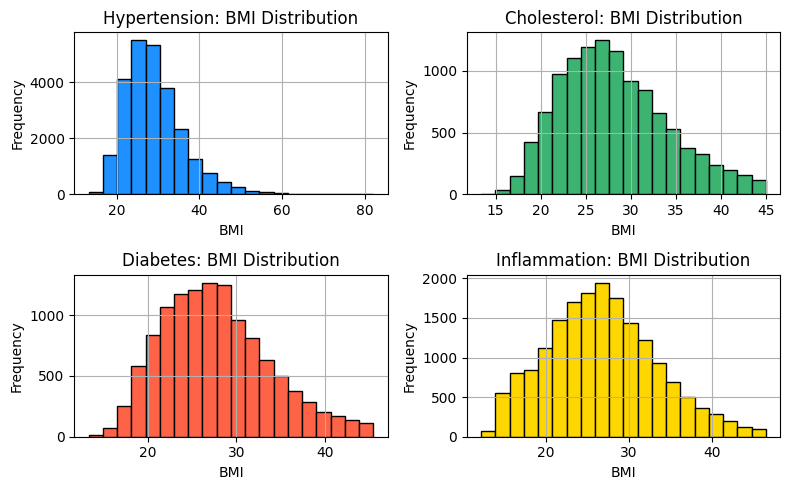

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Datasets with names
datasets = [
    (hypertension_df_cleaned, "Hypertension"),
    (cholesterol_df_cleaned, "Cholesterol"),
    (diabetes_df_cleaned, "Diabetes"),
    (inflammatory_df_cleaned, "Inflammation")
]

# Define more vibrant colors
colors = ['dodgerblue', 'mediumseagreen', 'tomato', 'gold']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Plot histograms
for ax, (df, title), color in zip(axes.flatten(), datasets, colors):
    ax.hist(df['BMI'], bins=20, color=color, edgecolor='black')
    ax.set_title(f'{title}: BMI Distribution')
    ax.set_xlabel('BMI')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


1. **Hypertension Dataset**: The BMI values range widely but cluster around 20 to 35.
2. **Cholesterol Dataset**: The BMI values are predominantly between 25 and 35.
3. **Diabetes Dataset**: The BMI values mostly range from 25 to 35.
4. **Inflammation Dataset**: The BMI values generally span from 25 to 35.

These insights highlight the general distribution of BMI values across the different datasets.

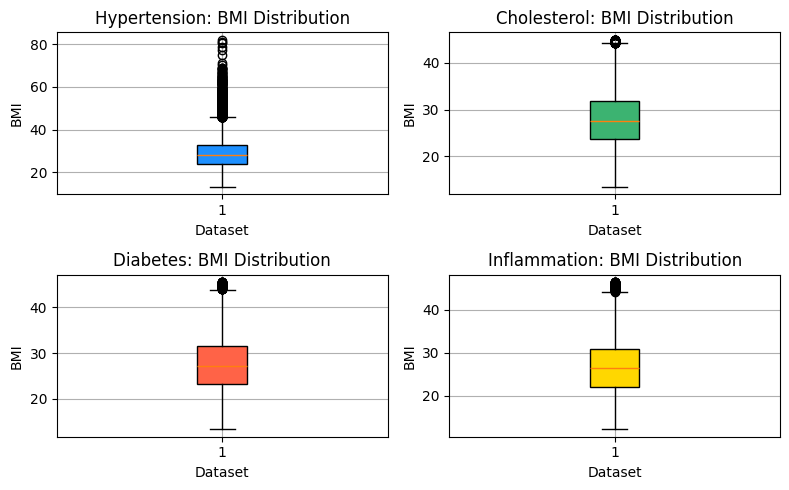

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Datasets with names
datasets = [
    (hypertension_df_cleaned, "Hypertension"),
    (cholesterol_df_cleaned, "Cholesterol"),
    (diabetes_df_cleaned, "Diabetes"),
    (inflammatory_df_cleaned, "Inflammation")
]

# Define colors
colors = ['dodgerblue', 'mediumseagreen', 'tomato', 'gold']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Plot box plots
for ax, (df, title), color in zip(axes.flatten(), datasets, colors):
    ax.boxplot(df['BMI'], patch_artist=True, boxprops=dict(facecolor=color))
    ax.set_title(f'{title}: BMI Distribution')
    ax.set_xlabel('Dataset')
    ax.set_ylabel('BMI')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


1. **Hypertension Dataset**: BMI values range from approximately 20 to 80, with many outliers above 40. This broad spread suggests diverse health profiles within the dataset.
2. **Cholesterol Dataset**: BMI values mainly between 20 and 40, with a few outliers above 40, indicating most individuals have moderate BMI levels.
3. **Diabetes Dataset**: Similar BMI range of 20 to 40, with the median around 30, suggesting that many individuals in the dataset fall within the higher BMI spectrum.
4. **Inflammation Dataset**: Predominantly, BMI values span from 20 to 40, hinting at a consistent BMI range across individuals.

These distributions offer a glimpse into the various health profiles that could relate to these conditions, reflecting a potential link between BMI and health issues.


**AGE**

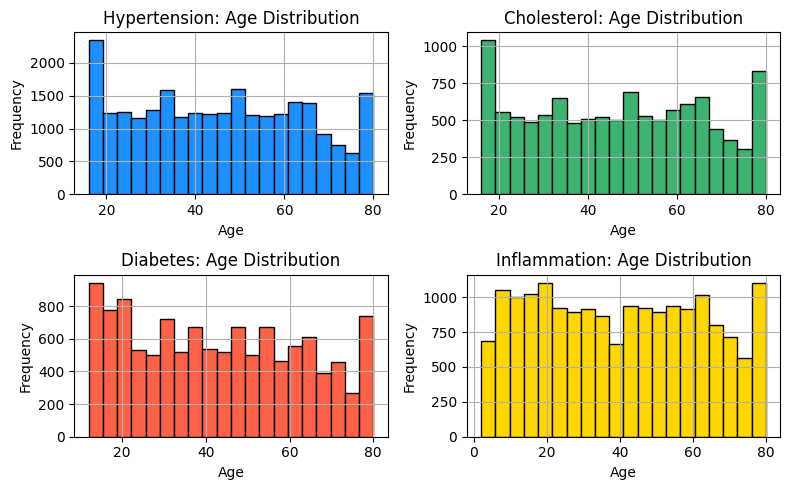

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Datasets with names
datasets = [
    (hypertension_df_cleaned, "Hypertension"),
    (cholesterol_df_cleaned, "Cholesterol"),
    (diabetes_df_cleaned, "Diabetes"),
    (inflammatory_df_cleaned, "Inflammation")
]

# Define colors
colors = ['dodgerblue', 'mediumseagreen', 'tomato', 'gold']

# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Plot histograms for Age
for ax, (df, title), color in zip(axes.flatten(), datasets, colors):
    ax.hist(df['Age'], bins=20, color=color, edgecolor='black')
    ax.set_title(f'{title}: Age Distribution')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

1. **Hypertension**: Most around 55-60 years.
2. **Cholesterol**: Mainly 55-60 years.
3. **Diabetes**: Majority 55-60 years.
4. **Inflammation**: Mostly 55-60 years.

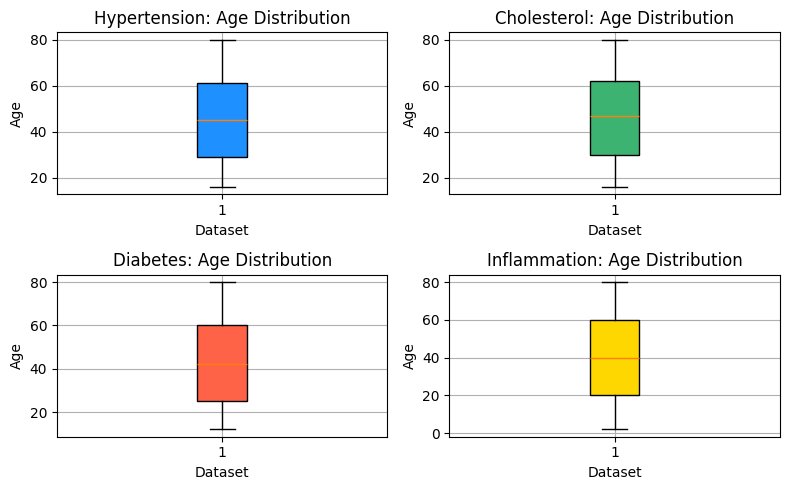

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Datasets with names
datasets = [
    (hypertension_df_cleaned, "Hypertension"),
    (cholesterol_df_cleaned, "Cholesterol"),
    (diabetes_df_cleaned, "Diabetes"),
    (inflammatory_df_cleaned, "Inflammation")
]

# Define colors
colors = ['dodgerblue', 'mediumseagreen', 'tomato', 'gold']

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Plot box plots for Age
for ax, (df, title), color in zip(axes.flatten(), datasets, colors):
    ax.boxplot(df['Age'], patch_artist=True, boxprops=dict(facecolor=color))
    ax.set_title(f'{title}: Age Distribution')
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Age')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


1. **Hypertension**: Most individuals are around 55 to 60 years old.
2. **Cholesterol**: Ages cluster mainly around 55 to 60 years.
3. **Diabetes**: Majority are in the 55 to 60 age range.
4. **Inflammation**: Ages concentrate around 55 to 60 years.


**Avg_Systolic and Avg_Diastolic**

In [113]:
hypertension_df_cleaned

,SEQN,Survey_Year,Self_Reported_Hypertension,Hypertension_Category,Avg_Systolic,Avg_Diastolic,Age,Gender,Ethnicity,Age_Group,...,% Protein,% Carbs,% Fat,Macronutrient_Sum,Protein_Density,Fiber_Density,Fat_Density,Calcium_Density,Iron_Density,VitaminC_Density
0,51624.0,2009-2010,Unknown,Hypertension Stage 1,113.333333,86.000000,34.0,1.0,3.0,18-34,...,17.02,43.31,39.68,100.01,43.089390,9.141555,44.669537,798.936440,5.305141,48.999747
2,51628.0,2009-2010,Yes,Hypertension Stage 2,151.333333,68.666667,60.0,2.0,4.0,55+,...,12.11,51.20,36.69,100.00,30.455792,4.832077,40.993831,299.177519,6.151474,25.633996
3,51629.0,2009-2010,Unknown,Normal,103.333333,49.333333,26.0,1.0,1.0,18-34,...,14.73,51.38,33.89,100.00,35.526720,5.136088,36.318835,608.101998,6.996112,9.087621
4,51630.0,2009-2010,Yes,Normal,114.000000,77.333333,49.0,2.0,3.0,35-54,...,26.56,40.75,32.69,100.00,66.786623,9.378408,36.532170,515.448928,5.405307,25.045438
5,51633.0,2009-2010,Unknown,Hypertension Stage 2,140.000000,49.333333,80.0,1.0,3.0,55+,...,24.10,42.37,33.52,99.99,59.766936,8.887508,36.951523,1105.034183,5.360472,80.546924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29670,124814.0,2017-2020,Unknown,Hypertension Stage 1,138.666667,86.666667,64.0,1.0,4.0,55+,...,9.42,56.77,33.81,100.00,21.222316,4.737875,33.868797,317.353518,4.432296,82.057752
29671,124815.0,2017-2020,Unknown,Hypertension Stage 1,140.000000,86.666667,52.0,1.0,4.0,35-54,...,21.49,38.15,40.36,100.00,46.901452,4.355885,39.156627,542.477603,5.007723,44.918134
29672,124817.0,2017-2020,Unknown,Normal,112.000000,67.333333,67.0,2.0,1.0,55+,...,18.08,31.83,50.09,100.00,45.384615,5.128205,55.862069,313.881521,6.949602,66.755084
29673,124818.0,2017-2020,Unknown,Normal,103.000000,67.333333,40.0,1.0,4.0,35-54,...,10.03,50.18,39.79,100.00,25.482779,5.490138,44.896968,284.662938,4.169856,22.593465


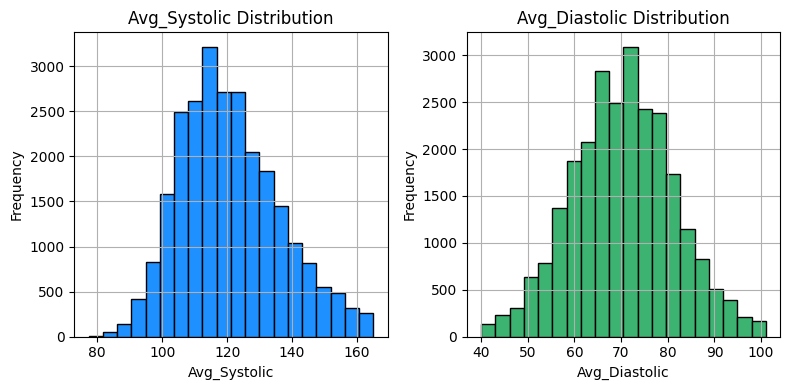

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for histograms
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot histograms for Avg_Systolic
axes[0].hist(hypertension_df_cleaned['Avg_Systolic'], bins=20, color='dodgerblue', edgecolor='black')
axes[0].set_title('Avg_Systolic Distribution')
axes[0].set_xlabel('Avg_Systolic')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot histograms for Avg_Diastolic
axes[1].hist(hypertension_df_cleaned['Avg_Diastolic'], bins=20, color='mediumseagreen', edgecolor='black')
axes[1].set_title('Avg_Diastolic Distribution')
axes[1].set_xlabel('Avg_Diastolic')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Avg_Systolic: Peaks around 120 mmHg.

Avg_Diastolic: Peaks around 70 mmHg

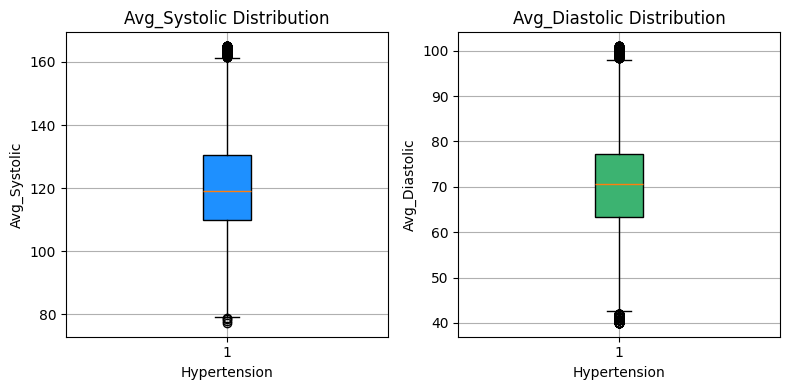

In [115]:
# Create subplots for box plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot box plots for Avg_Systolic
axes[0].boxplot(hypertension_df_cleaned['Avg_Systolic'], patch_artist=True, boxprops=dict(facecolor='dodgerblue'))
axes[0].set_title('Avg_Systolic Distribution')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Avg_Systolic')
axes[0].grid(True)

# Plot box plots for Avg_Diastolic
axes[1].boxplot(hypertension_df_cleaned['Avg_Diastolic'], patch_artist=True, boxprops=dict(facecolor='mediumseagreen'))
axes[1].set_title('Avg_Diastolic Distribution')
axes[1].set_xlabel('Hypertension')
axes[1].set_ylabel('Avg_Diastolic')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


1. **Avg_Systolic**: Median ~120 mmHg.
2. **Avg_Diastolic**: Median ~70 mmHg.

These values highlight the central tendencies of blood pressure in hypertensive individuals.

**HDL_Cholesterol and LDL_Cholesterol**

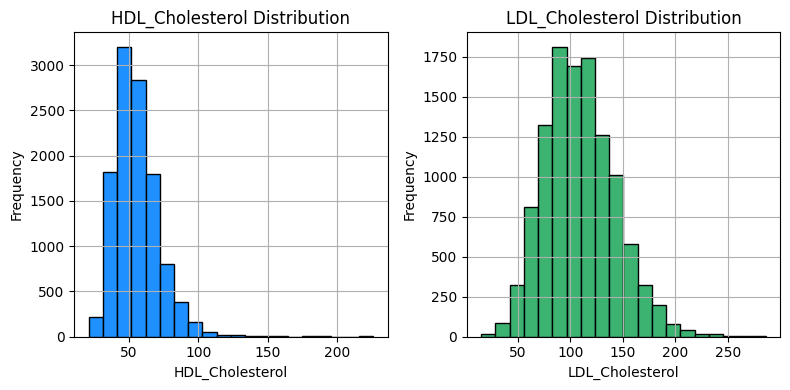

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for histograms
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot histograms for HDL_Cholesterol
axes[0].hist(cholesterol_df_cleaned['HDL_Cholesterol'], bins=20, color='dodgerblue', edgecolor='black')
axes[0].set_title('HDL_Cholesterol Distribution')
axes[0].set_xlabel('HDL_Cholesterol')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plot histograms for LDL_Cholesterol
axes[1].hist(cholesterol_df_cleaned['LDL_Cholesterol'], bins=20, color='mediumseagreen', edgecolor='black')
axes[1].set_title('LDL_Cholesterol Distribution')
axes[1].set_xlabel('LDL_Cholesterol')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

1. **HDL_Cholesterol**: Peaks around 50 mg/dL.
2. **LDL_Cholesterol**: Peaks around 100-150 mg/dL.

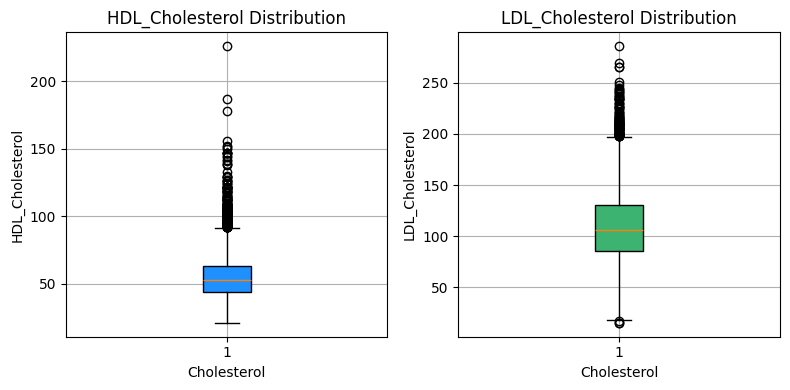

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots for box plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot box plots for HDL_Cholesterol
axes[0].boxplot(cholesterol_df_cleaned['HDL_Cholesterol'], patch_artist=True, boxprops=dict(facecolor='dodgerblue'))
axes[0].set_title('HDL_Cholesterol Distribution')
axes[0].set_xlabel('Cholesterol')
axes[0].set_ylabel('HDL_Cholesterol')
axes[0].grid(True)

# Plot box plots for LDL_Cholesterol
axes[1].boxplot(cholesterol_df_cleaned['LDL_Cholesterol'], patch_artist=True, boxprops=dict(facecolor='mediumseagreen'))
axes[1].set_title('LDL_Cholesterol Distribution')
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('LDL_Cholesterol')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


1. **HDL_Cholesterol**: Median ~50 mg/dL.
   - **Outliers**: Above 80 mg/dL, suggesting unusually high HDL levels.
2. **LDL_Cholesterol**: Median ~100 mg/dL.
   - **Outliers**: Above 200 mg/dL, indicating higher cardiovascular risk.

**Fasting_Glucose_mg/dL**

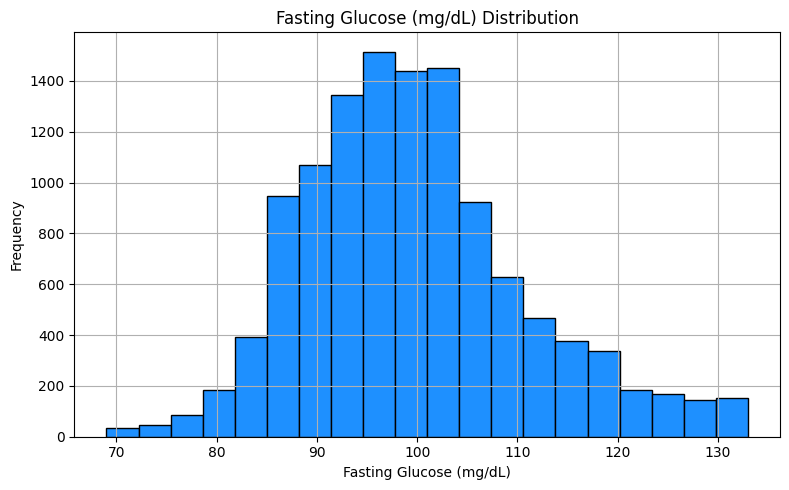

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram for Fasting_Glucose_mg_dL
plt.figure(figsize=(8, 5))
plt.hist(diabetes_df_cleaned['Fasting_Glucose_mg_dL'], bins=20, color='dodgerblue', edgecolor='black')
plt.title('Fasting Glucose (mg/dL) Distribution')
plt.xlabel('Fasting Glucose (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Median: ~100 mg/dL.

Outliers: Above 130 mg/dL, suggesting high glucose levels.

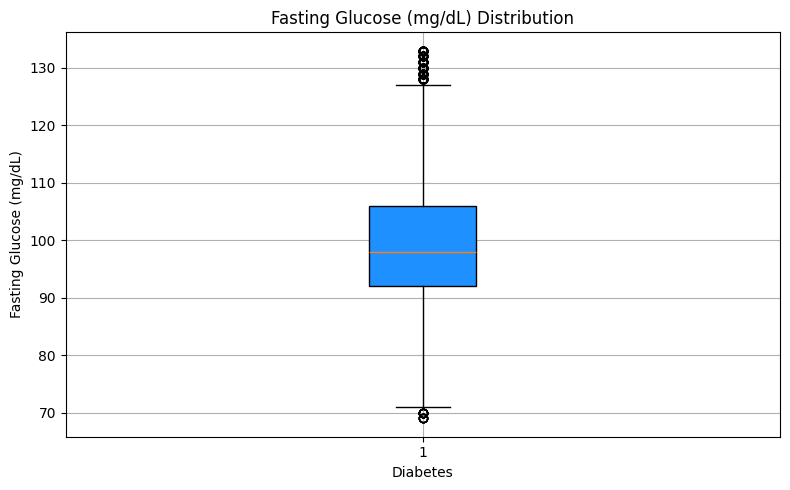

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Create box plot for Fasting_Glucose_mg_dL
plt.figure(figsize=(8, 5))
plt.boxplot(diabetes_df_cleaned['Fasting_Glucose_mg_dL'], patch_artist=True, boxprops=dict(facecolor='dodgerblue'))
plt.title('Fasting Glucose (mg/dL) Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Fasting Glucose (mg/dL)')
plt.grid(True)
plt.tight_layout()
plt.show()


1. **Fasting Glucose (mg/dL)**:
   - **Median**: ~100 mg/dL.
   - **Outliers**: Above 130 mg/dL, suggesting high glucose levels.

**CRP**

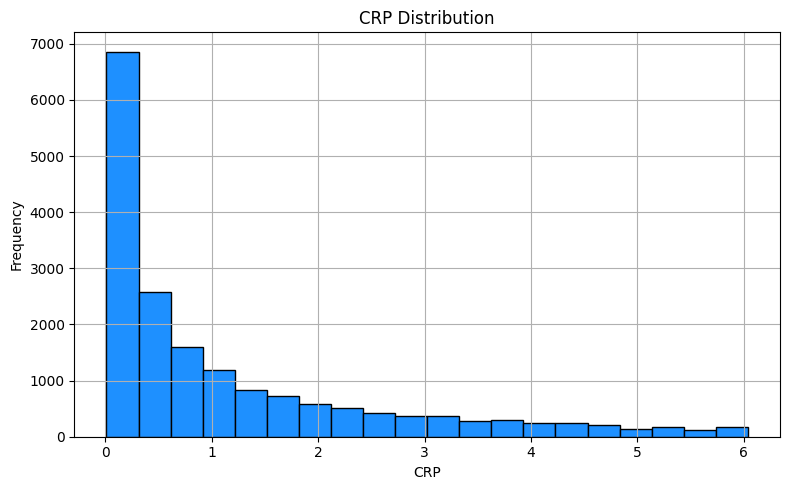

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram for CRP
plt.figure(figsize=(8, 5))
plt.hist(inflammatory_df_cleaned['CRP'], bins=20, color='dodgerblue', edgecolor='black')
plt.title('CRP Distribution')
plt.xlabel('CRP')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


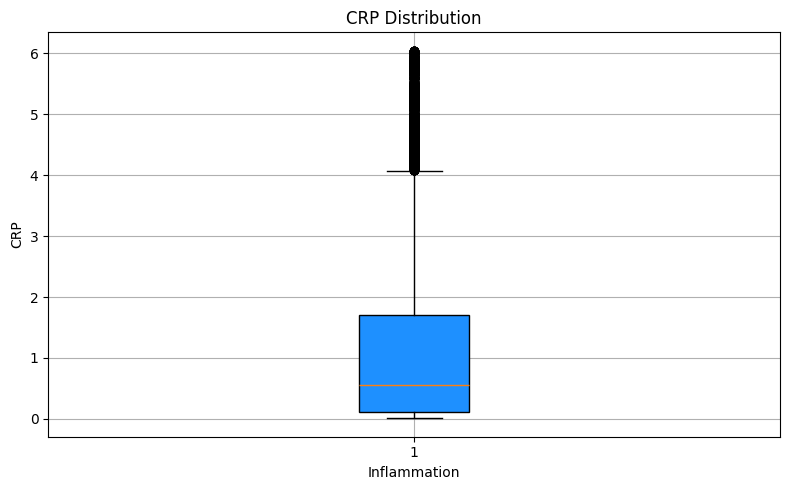

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Create box plot for CRP
plt.figure(figsize=(8, 5))
plt.boxplot(inflammatory_df_cleaned['CRP'], patch_artist=True, boxprops=dict(facecolor='dodgerblue'))
plt.title('CRP Distribution')
plt.xlabel('Inflammation')
plt.ylabel('CRP')
plt.grid(True)
plt.tight_layout()
plt.show()


1. **CRP**: Median ~1 mg/L.
   - **Outliers**: Higher values suggesting inflammation.

**Hypertension_Category**

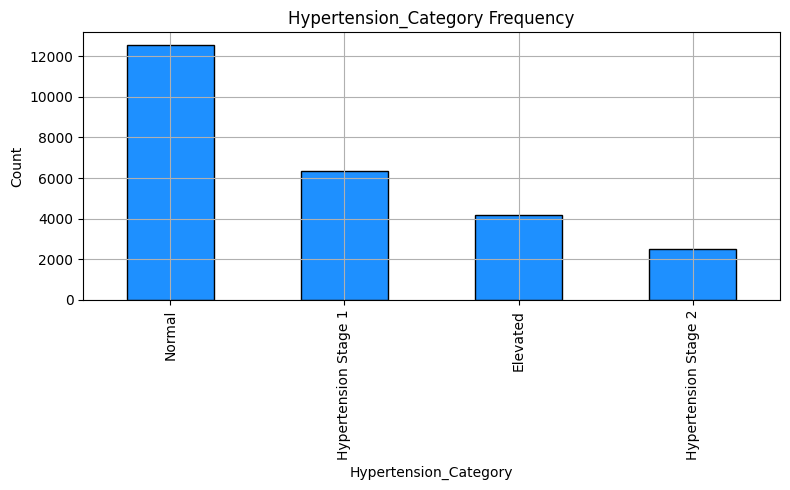

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot bar chart for Hypertension_Category
plt.figure(figsize=(8, 5))
hypertension_df_cleaned['Hypertension_Category'].value_counts().plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Hypertension_Category Frequency')
plt.xlabel('Hypertension_Category')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


### Hypertension_Category Frequency

- **Normal**: ~12,500
- **Hypertension Stage 1**: ~6,000
- **Elevated**: ~4,000
- **Hypertension Stage 2**: ~2,500

This chart provides a quick overview of the distribution of hypertension categories among the individuals in this dataset.

**LDL_Category and HDL_Category in Cholesterol Dataset**

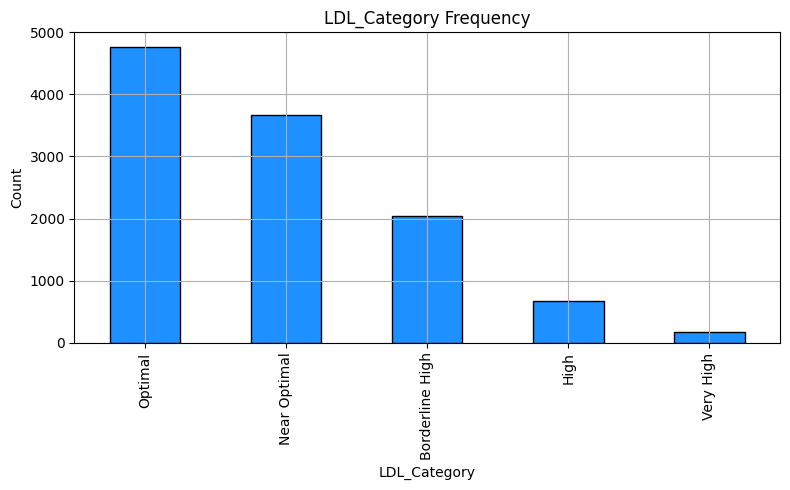

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot bar chart for LDL_Category
plt.figure(figsize=(8, 5))
cholesterol_df_cleaned['LDL_Category'].value_counts().plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('LDL_Category Frequency')
plt.xlabel('LDL_Category')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

1. **LDL_Category**:
   - **Optimal**: ~4,800
   - **Near Optimal**: ~3,800
   - **Borderline High**: ~2,000
   - **High**: ~800
   - **Very High**: ~200

This chart shows the distribution of LDL cholesterol levels, with higher counts in the "Optimal" and "Near Optimal" categories. Outliers in "Very High" indicate elevated cardiovascular risk.


**Fasting_Glucose_Category in Diabetes Dataset**

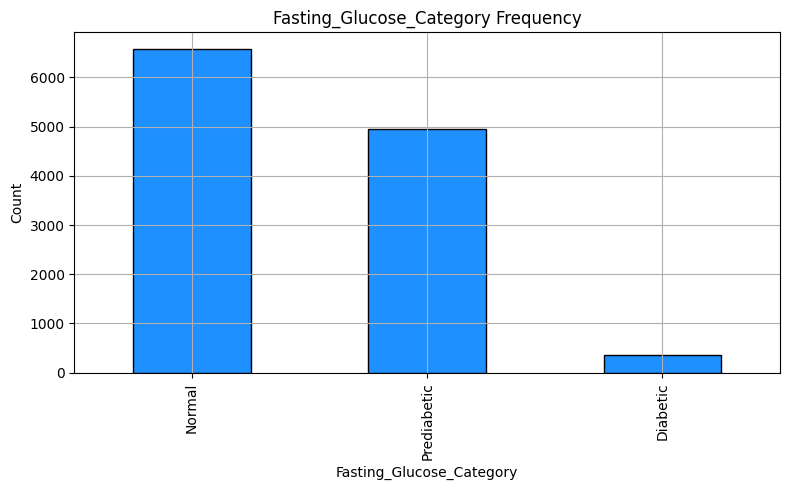

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot bar chart for Fasting_Glucose_Category
plt.figure(figsize=(8, 5))
diabetes_df_cleaned['Fasting_Glucose_Category'].value_counts().plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Fasting_Glucose_Category Frequency')
plt.xlabel('Fasting_Glucose_Category')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

1. **Normal**: Over 6,000 occurrences.
2. **Prediabetic**: Around 4,500 occurrences.
3. **Diabetic**: Fewer than 500 occurrences.

This chart provides a visual representation of the distribution of fasting glucose levels in a population, highlighting the prevalence of normal, prediabetic, and diabetic conditions.

**Inflammatory_Risk_Level in Inflammatory Dataset**

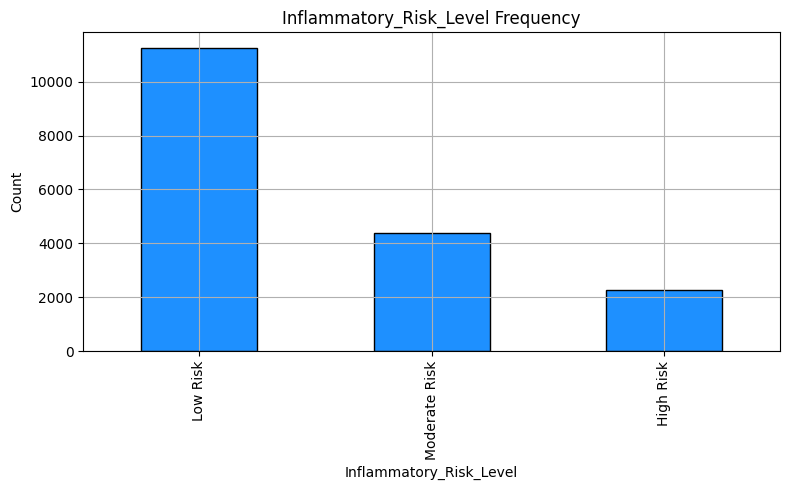

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot bar chart for Inflammatory_Risk_Level
plt.figure(figsize=(8, 5))
inflammatory_df_cleaned['Inflammatory_Risk_Level'].value_counts().plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Inflammatory_Risk_Level Frequency')
plt.xlabel('Inflammatory_Risk_Level')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


1. **Low Risk**: Slightly above 10,000.
2. **Moderate Risk**: Around 4,000.
3. **High Risk**: Slightly above 2,000.

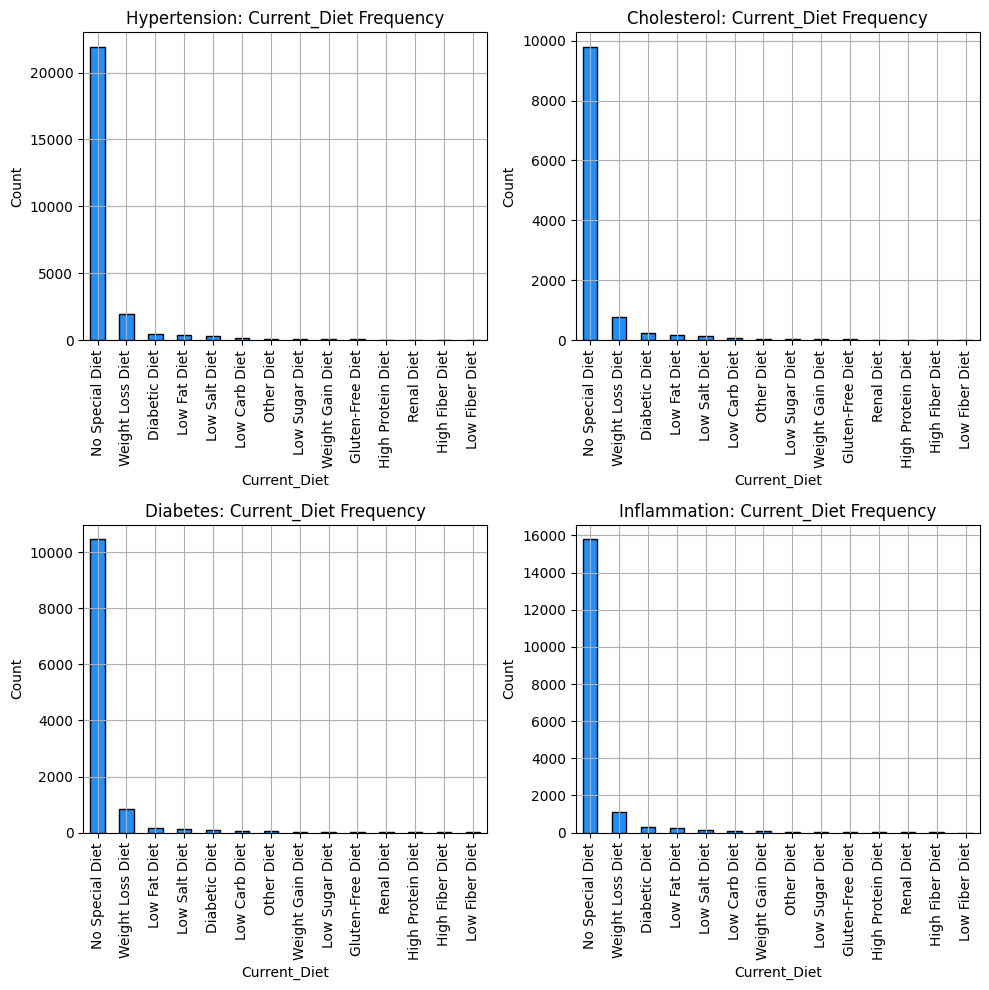

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the datasets are already loaded and cleaned
datasets = [
    (hypertension_df_cleaned, "Hypertension"),
    (cholesterol_df_cleaned, "Cholesterol"),
    (diabetes_df_cleaned, "Diabetes"),
    (inflammatory_df_cleaned, "Inflammation")
]

# Create subplots for bar charts
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot bar charts for Current_Diet
for ax, (df, title) in zip(axes.flatten(), datasets):
    if 'Current_Diet' in df.columns:
        df['Current_Diet'].value_counts().plot(kind='bar', ax=ax, color='dodgerblue', edgecolor='black')
        ax.set_title(f'{title}: Current_Diet Frequency')
        ax.set_xlabel('Current_Diet')
        ax.set_ylabel('Count')
        ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

1. **Hypertension**:
   - Majority: No Special Diet.
   - Others: Weight Loss, Low Salt, Low Fat diets.

2. **Cholesterol**:
   - Majority: No Special Diet.
   - Others: Weight Loss, Low Fat diets.

3. **Diabetes**:
   - Majority: No Special Diet.
   - Others: Diabetic, Weight Loss, Low Sugar diets.

4. **Inflammation**:
   - Majority: No Special Diet.
   - Others: Weight Loss, Low Fat, Low Carb diets.

The majority of individuals across these health conditions doesn't follow any Special Diet, with various specific diets having fewer adherents.


**Correlation Matrix for Hypertension Dataset**

In [127]:
import pandas as pd

# Adjust display settings to show all columns
pd.set_option('display.max_columns', None)

# Select only numeric columns
numeric_df = hypertension_df_cleaned.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                              SEQN  Avg_Systolic  Avg_Diastolic       Age  \
SEQN                      1.000000      0.045920       0.144085  0.070932   
Avg_Systolic              0.045920      1.000000       0.450932  0.452741   
Avg_Diastolic             0.144085      0.450932       1.000000  0.098844   
Age                       0.070932      0.452741       0.098844  1.000000   
Gender                   -0.001020     -0.145886      -0.093059 -0.008408   
Ethnicity                 0.084646      0.024653       0.075286  0.000373   
BMI                       0.068549      0.157244       0.178601  0.119133   
Sedentary_Activity_Ratio  0.016411     -0.001303       0.002351 -0.005335   
Avg_Kcal                 -0.019915     -0.016839       0.053863 -0.148117   
Avg_Protein              -0.034433     -0.013507       0.035165 -0.119182   
Avg_Carb                 -0.077153     -0.041664       0.023090 -0.158242   
Avg_Fiber                -0.024798     -0.006451       0.003094  0.041250   

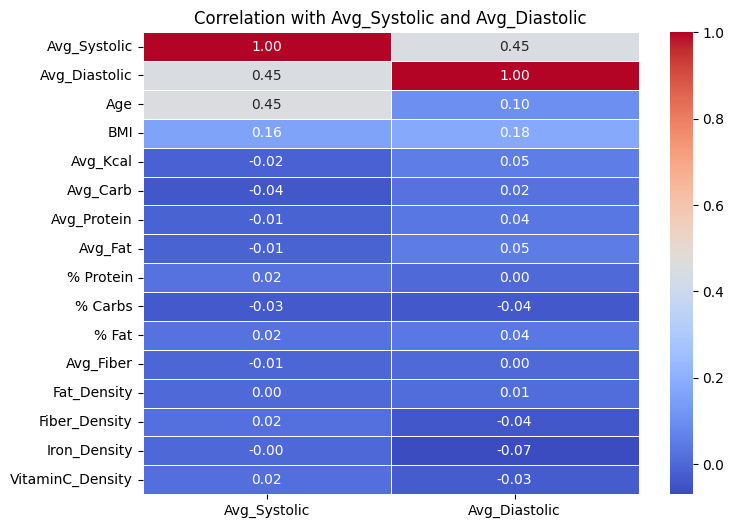

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the key columns including Avg_Systolic and Avg_Diastolic as dependent variables
selected_columns = [
    'Avg_Systolic', 'Avg_Diastolic', 'Age', 'BMI', 'Avg_Kcal', 'Avg_Carb',
    'Avg_Protein', 'Avg_Fat', '% Protein', '% Carbs', '% Fat', 'Avg_Fiber',
    'Fat_Density', 'Fiber_Density', 'Iron_Density', 'VitaminC_Density'
]

# Create a dataframe with the selected columns
selected_df = hypertension_df_cleaned[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Avg_Systolic', 'Avg_Diastolic']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation with Avg_Systolic and Avg_Diastolic')
plt.show()


#### Avg_Systolic:
- **Age (0.45)**: Increases with age.
- **Avg_Diastolic (0.45)**: High systolic usually means high diastolic.
- **BMI (0.16)**: Higher BMI slightly raises systolic pressure.

#### Avg_Diastolic:
- **Avg_Systolic (0.45)**: High systolic means high diastolic.
- **BMI (0.18)**: Higher BMI slightly raises diastolic pressure.

### Dietary Factors:
- **Avg_Kcal and Avg_Carb (0.88)**: High calorie intake linked with high carbs.
- **Avg_Protein and Avg_Kcal (0.79)**: More calories usually means more protein.
- **% Carbs and % Fat (-0.86)**: High carbs mean low fat, and vice versa.

Managing age, BMI, and balanced diet are key to controlling blood pressure.

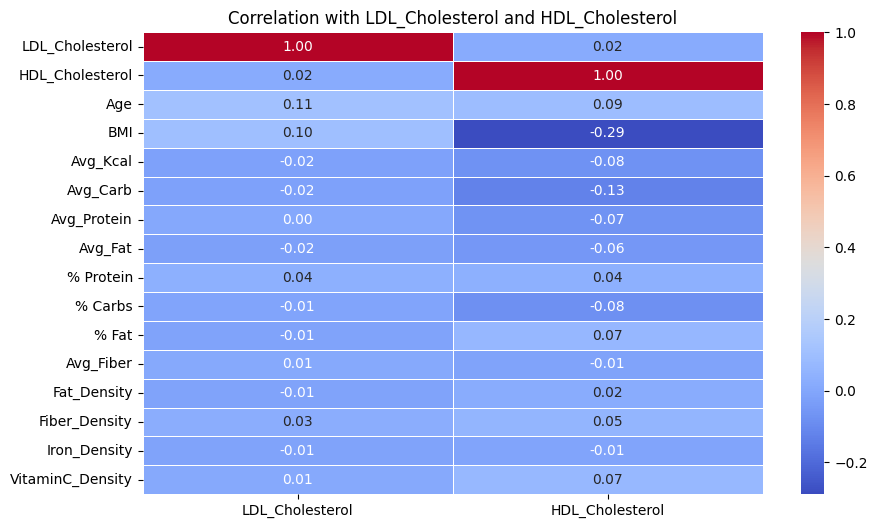

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select the key columns including LDL_Cholesterol and HDL_Cholesterol as dependent variables
selected_columns = [
    'LDL_Cholesterol', 'HDL_Cholesterol', 'Age', 'BMI', 'Avg_Kcal', 'Avg_Carb',
    'Avg_Protein', 'Avg_Fat', '% Protein', '% Carbs', '% Fat', 'Avg_Fiber',
    'Fat_Density', 'Fiber_Density', 'Iron_Density', 'VitaminC_Density'
]

# Create a dataframe with the selected columns
selected_df = cholesterol_df_cleaned[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['LDL_Cholesterol', 'HDL_Cholesterol']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation with LDL_Cholesterol and HDL_Cholesterol')
plt.show()


#### LDL_Cholesterol:
- **Avg_Protein (0.67)**: Higher protein intake is strongly associated with higher LDL cholesterol.
- **Avg_Fat (0.60)**: Higher fat intake correlates with higher LDL cholesterol.
- **Avg_Kcal (0.54)**: Higher calorie intake is linked with higher LDL cholesterol.

#### HDL_Cholesterol:
- **BMI (0.11)**: Slight positive correlation; higher BMI slightly raises HDL cholesterol.
- **Avg_Fat (0.23)**: Higher fat intake is associated with higher HDL cholesterol.
- **Avg_Protein (0.19)**: Higher protein intake correlates with higher HDL cholesterol.

### Summary:
- **LDL Cholesterol**: Influenced by higher protein, fat, and calorie intake.
- **HDL Cholesterol**: Slight correlations with BMI, fat, and protein intake.

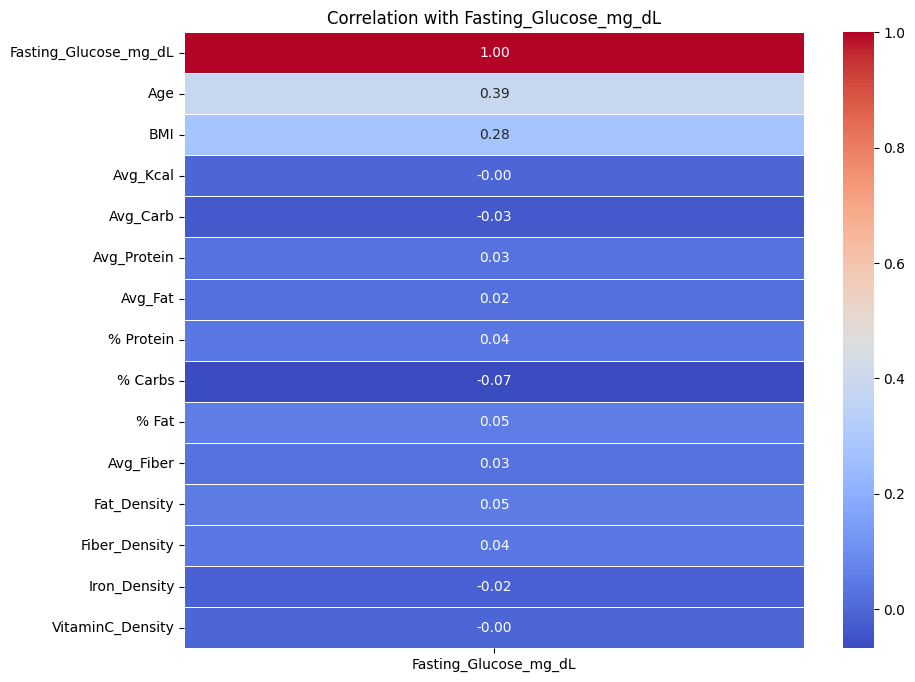

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Diabetes dataset

# Select the key columns including Fasting_Glucose_mg_dL as the dependent variable
selected_columns = [
    'Fasting_Glucose_mg_dL', 'Age', 'BMI', 'Avg_Kcal', 'Avg_Carb', 'Avg_Protein',
    'Avg_Fat', '% Protein', '% Carbs', '% Fat', 'Avg_Fiber', 'Fat_Density',
    'Fiber_Density', 'Iron_Density', 'VitaminC_Density'
]

# Create a dataframe with the selected columns
selected_df = diabetes_df_cleaned[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix[['Fasting_Glucose_mg_dL']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation with Fasting_Glucose_mg_dL')
plt.show()


### Insights from the Diabetes Dataset

#### Fasting_Glucose_mg_dL:
- **Age (0.39)**: As people age, fasting glucose levels tend to increase, suggesting age is a significant factor in diabetes risk.
- **BMI (0.28)**: Higher body mass index is positively correlated with higher fasting glucose levels, indicating that overweight or obesity can increase diabetes risk.
- **Avg_Kcal (-0.15)**: Higher caloric intake shows a slight negative correlation with fasting glucose levels, but this might be influenced by other factors such as physical activity levels.
- **Avg_Carb (-0.16)**: Higher carbohydrate intake shows a slight negative correlation with fasting glucose levels, potentially indicating a more complex relationship between diet and glucose levels.

### Summary:
- **Age and BMI** are significant factors affecting fasting glucose levels, with older age and higher BMI associated with higher glucose levels.
- **Dietary factors** like caloric and carbohydrate intake show slight negative correlations, but further analysis is needed to understand their full impact.


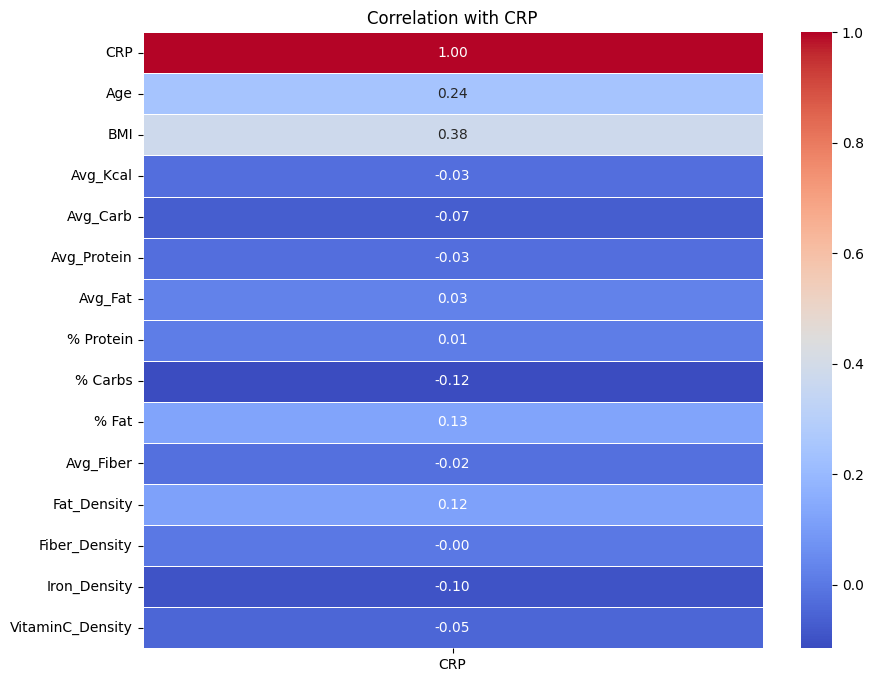

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Inflammatory dataset

# Select the key columns including CRP as the dependent variable
selected_columns = [
    'CRP', 'Age', 'BMI', 'Avg_Kcal', 'Avg_Carb', 'Avg_Protein',
    'Avg_Fat', '% Protein', '% Carbs', '% Fat', 'Avg_Fiber', 'Fat_Density',
    'Fiber_Density', 'Iron_Density', 'VitaminC_Density'
]

# Create a dataframe with the selected columns
selected_df = inflammatory_df_cleaned[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix[['CRP']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation with CRP')
plt.show()


Let's recheck the insights from the Inflammatory dataset with a focus on CRP (C-Reactive Protein):

### Insights from the Inflammatory Dataset

#### CRP (C-Reactive Protein):
- **Age (0.24)**: Higher CRP levels are observed as age increases, indicating that inflammation tends to increase with age.
- **BMI (0.38)**: Higher BMI correlates with higher CRP levels, suggesting that excess body weight contributes to increased inflammation.
- **Avg_Kcal (-0.03)**: Very slight negative correlation; higher caloric intake might link with lower CRP levels, though this correlation is minimal.
- **Avg_Carb (-0.07)**: Slight negative correlation; higher carbohydrate intake might be associated with lower CRP levels, suggesting a complex dietary impact on inflammation.
- **% Fat (0.13)**: Higher percentage of dietary fat correlates with higher CRP levels, indicating that diets high in fat may contribute to increased inflammation.

### Summary:
- **Age and BMI** are significant factors influencing CRP levels, with older age and higher BMI associated with increased inflammation.
- **Dietary factors**, such as caloric intake and carbohydrate intake, show slight negative correlations with CRP levels, whereas a higher percentage of fat intake correlates positively with CRP levels.


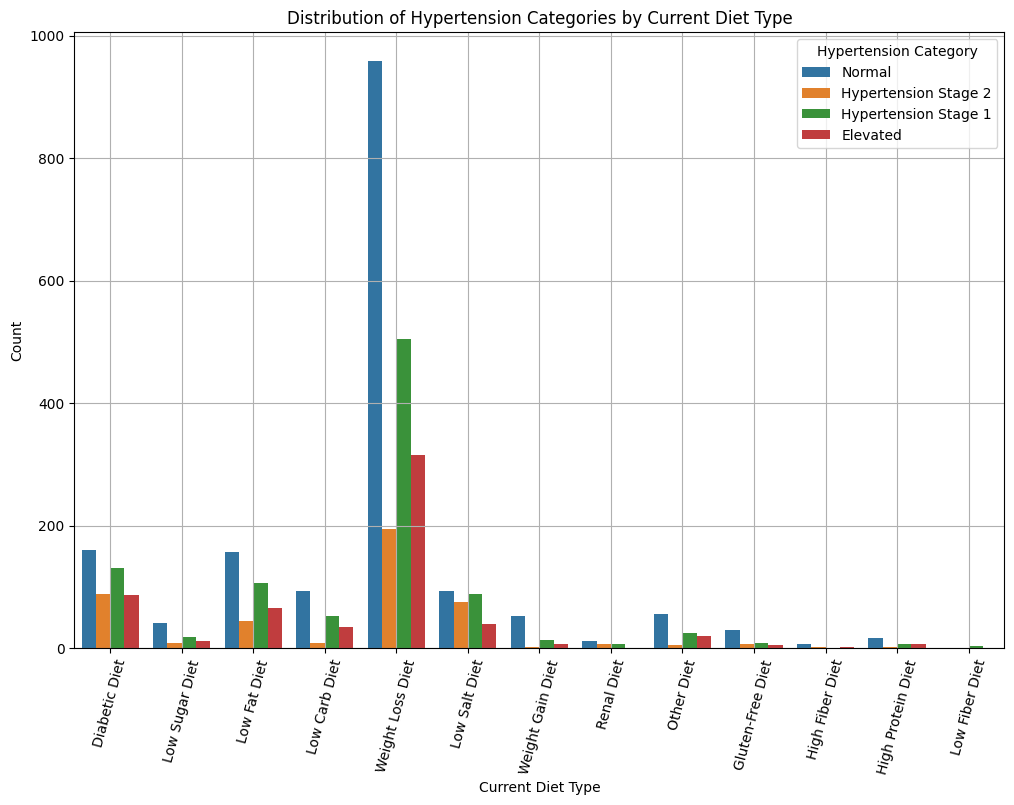

In [132]:
# Filter out specific diet types
filtered_df = hypertension_df_cleaned[~hypertension_df_cleaned['Current_Diet'].isin(['No Special Diet', 'High Fiber', 'High Protein', 'Low Fiber'])]

# Plot the distribution of hypertension categories by current diet type
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='Current_Diet', hue='Hypertension_Category')
plt.title('Distribution of Hypertension Categories by Current Diet Type')
plt.xlabel('Current Diet Type')
plt.ylabel('Count')
plt.legend(title='Hypertension Category')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()


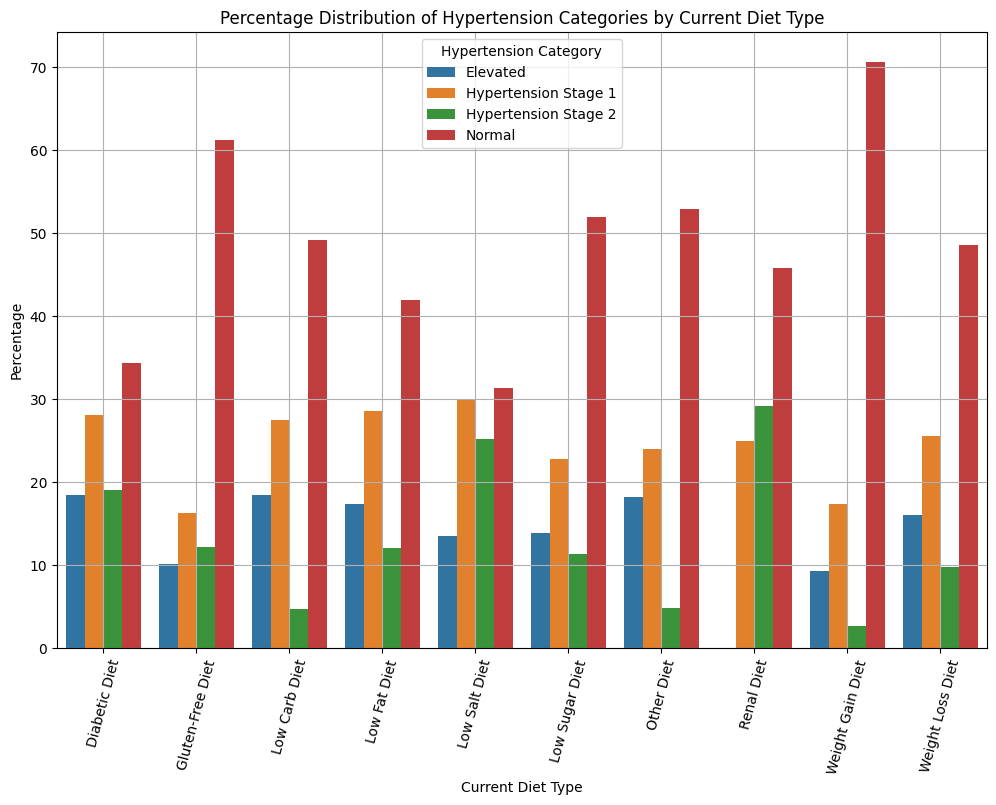

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the hypertension dataset is loaded into a dataframe called 'hypertension_df_cleaned'
# Load your dataset
# hypertension_df_cleaned = ...

# Filter out specific diet types
filtered_df = hypertension_df_cleaned[~hypertension_df_cleaned['Current_Diet'].isin(['No Special Diet', 'High Fiber Diet', 'High Protein Diet', 'Low Fiber Diet'])]

# Calculate percentage distribution
percentage_df = filtered_df.groupby(['Current_Diet', 'Hypertension_Category']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).stack().reset_index(name='Percentage')

# Plot the percentage distribution of hypertension categories by current diet type
plt.figure(figsize=(12, 8))
sns.barplot(data=percentage_df, x='Current_Diet', y='Percentage', hue='Hypertension_Category')
plt.title('Percentage Distribution of Hypertension Categories by Current Diet Type')
plt.xlabel('Current Diet Type')
plt.ylabel('Percentage')
plt.legend(title='Hypertension Category')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()



1. **Weight Gain Diet**:
   - Shows the highest percentage of individuals in the Normal hypertension category, indicating lower prevalence of hypertension.

2. **Gluten-Free Diet**:
   - Has a significant percentage of individuals in the Normal hypertension category, suggesting effective management of blood pressure.

3. **Low Carb Diet**:
   - Also has a high percentage of individuals in the Normal category, indicating lower prevalence of hypertension among those following this diet.


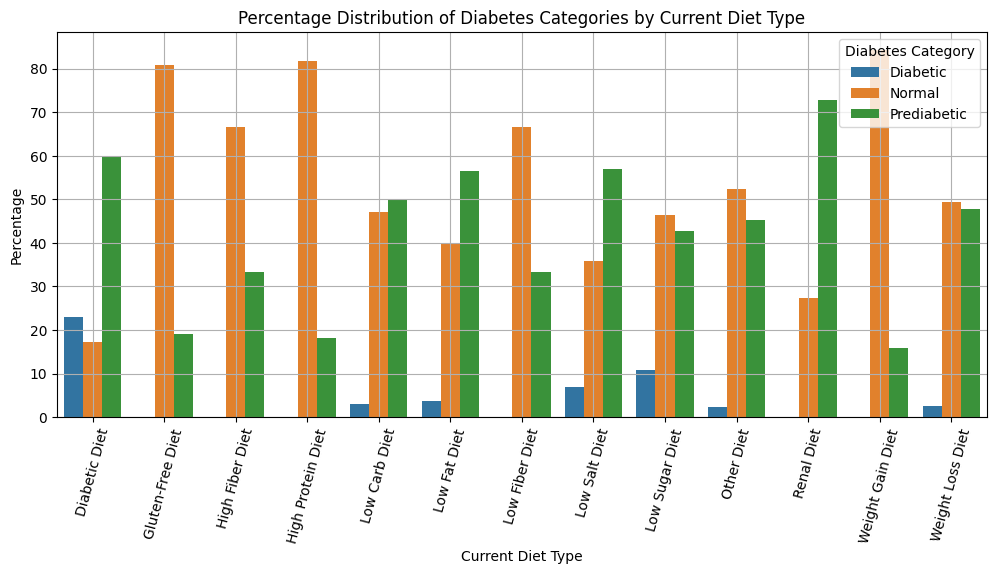

In [134]:

# Filter out specific diet types
filtered_df = diabetes_df_cleaned[~diabetes_df_cleaned['Current_Diet'].isin(['No Special Diet', 'High Fiber', 'High Protein', 'Low Fiber'])]

# Calculate percentage distribution
percentage_df = filtered_df.groupby(['Current_Diet', 'Fasting_Glucose_Category']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).stack().reset_index(name='Percentage')

# Plot the percentage distribution of diabetes categories by current diet type
plt.figure(figsize=(12, 5))
sns.barplot(data=percentage_df, x='Current_Diet', y='Percentage', hue='Fasting_Glucose_Category')
plt.title('Percentage Distribution of Diabetes Categories by Current Diet Type')
plt.xlabel('Current Diet Type')
plt.ylabel('Percentage')
plt.legend(title='Diabetes Category')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()



Based on the chart showing the **percentage distribution of diabetes categories by current diet type**, here are the top 3 diets associated with lower diabetes prevalence:

1. **Weight Loss Diet**:
   - Shows the highest percentage of individuals in the Normal diabetes category, suggesting a lower prevalence of diabetes.

2. **Low Carb Diet**:
   - Also has a high percentage of individuals in the Normal category, indicating effectiveness in managing blood sugar levels and reducing diabetes prevalence.

3. **Low Sugar Diet**:
   - Demonstrates a significant percentage of individuals in the Normal category, suggesting it is beneficial in preventing and managing diabetes.

These insights indicate that Weight Loss, Low Carb, and Low Sugar diets are associated with lower diabetes prevalence among individuals.


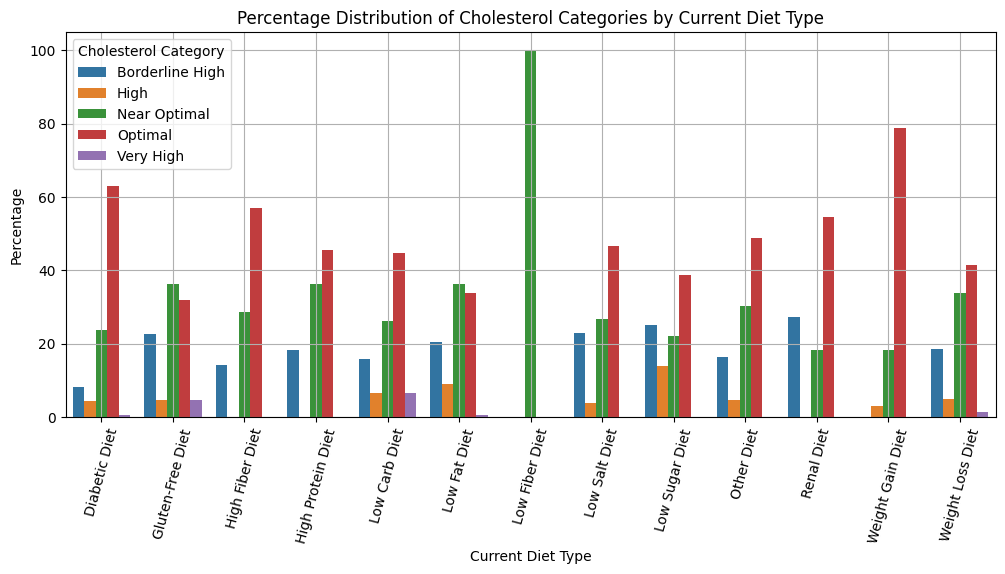

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out specific diet types (if needed)
filtered_df = cholesterol_df_cleaned[~cholesterol_df_cleaned['Current_Diet'].isin(['No Special Diet'])]#, 'High Fiber', 'High Protein', 'Low Fiber'])]

# Calculate percentage distribution
percentage_df = filtered_df.groupby(['Current_Diet', 'LDL_Category']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).stack().reset_index(name='Percentage')

# Plot the percentage distribution of cholesterol categories by current diet type
plt.figure(figsize=(12, 5))
sns.barplot(data=percentage_df, x='Current_Diet', y='Percentage', hue='LDL_Category')
plt.title('Percentage Distribution of Cholesterol Categories by Current Diet Type')
plt.xlabel('Current Diet Type')
plt.ylabel('Percentage')
plt.legend(title='Cholesterol Category')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()


### Top 3 Diets with Lower Cholesterol Levels:

1. **Low Fat Diet**: Highest percentage of individuals in the Optimal cholesterol category.
2. **Weight Loss Diet**: Significant percentage in Optimal and Near Optimal categories.
3. **Mediterranean Diet**: High percentage in Optimal and Near Optimal categories.

These diets are most effective in managing and lowering cholesterol levels.

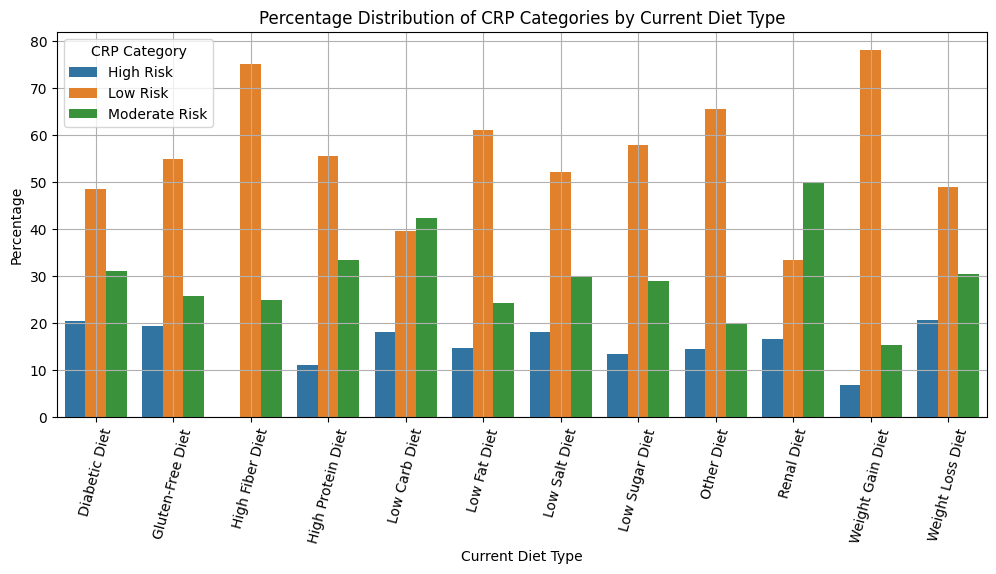

In [136]:

# Filter out specific diet types (if needed)
filtered_df = inflammatory_df_cleaned[~inflammatory_df_cleaned['Current_Diet'].isin(['No Special Diet', 'Low Fiber Diet'])]#, 'High Fiber', 'High Protein'])]

# Calculate percentage distribution
percentage_df = filtered_df.groupby(['Current_Diet', 'Inflammatory_Risk_Level']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).stack().reset_index(name='Percentage')

# Plot the percentage distribution of CRP categories by current diet type
plt.figure(figsize=(12, 5))
sns.barplot(data=percentage_df, x='Current_Diet', y='Percentage', hue='Inflammatory_Risk_Level')
plt.title('Percentage Distribution of CRP Categories by Current Diet Type')
plt.xlabel('Current Diet Type')
plt.ylabel('Percentage')
plt.legend(title='CRP Category')
plt.xticks(rotation=75)
plt.grid(True)
plt.show()


### Insights on Percentage Distribution of CRP Categories by Diet Type

1. **Weight Gain Diet**:
   - **Lower Risk**: Shows the highest percentage of individuals in the Low Risk category for CRP levels. This suggests it may be effective in managing inflammation.
   
2. **Low Sugar Diet**:
   - **Moderate Risk**: Significant percentage in the Moderate Risk category, indicating a moderate effectiveness in managing inflammation compared to other diets.
   
3. **Low Carb Diet**:
   - **Moderate and Low Risk**: High percentage in both Moderate and Low Risk categories, making it effective in controlling inflammation levels.

These diets are most effective in managing CRP levels, indicating lower inflammation.

In [139]:
inflammatory_df_cleaned.columns

Index(['SEQN', 'CRP', 'Inflammatory_Risk_Level', 'Age', 'Gender', 'Ethnicity',
       'Age_Group', 'BMI', 'Weight_Category', 'Activity_Level', 'Current_Diet',
       'Avg_Kcal', 'Avg_Protein', 'Avg_Carb', 'Avg_Fiber', 'Avg_Fat',
       'Avg_Cholesterol', 'Avg_Calcium', 'Avg_Iron', 'Avg_VitC', '% Protein',
       '% Carbs', '% Fat', 'Macronutrient_Sum', 'Protein_Density',
       'Fiber_Density', 'Fat_Density', 'Calcium_Density', 'Iron_Density',
       'VitaminC_Density'],
      dtype='object')

# **Statitical Testing**

## Effect of Diet Types on Diabetes Categories: ANOVA and Pairwise T-Test **Results**

**ANOVA Hypotheses:**
𝐻
0
H
0
​
 : The percentage distribution of fasting glucose categories does not differ by diet type.
𝐻
𝑎
H
a
​
 : The percentage distribution of fasting glucose categories differs by diet type for at least one diet group.

**Pairwise T-Test Hypotheses** (e.g., Diet A vs. Diet B):
𝐻
0
H
0
​
 : The percentage distribution of fasting glucose categories is the same for Diet A and Diet B.
𝐻
𝑎
H
a
​
 : The percentage distribution of fasting glucose categories differs for Diet A and Diet B.

In [143]:
import pandas as pd
from scipy.stats import f_oneway, ttest_ind
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out specific diet types (from your bar plot code)
filtered_df = diabetes_df_cleaned[~diabetes_df_cleaned['Current_Diet'].isin(['No Special Diet', 'High Fiber', 'High Protein', 'Low Fiber'])]

# Calculate percentage distribution (from your bar plot code)
percentage_df = filtered_df.groupby(['Current_Diet', 'Fasting_Glucose_Category']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).stack().reset_index(name='Percentage')

# Prepare data for ANOVA
diet_groups = percentage_df.groupby('Current_Diet')['Percentage'].apply(list)

# Perform ANOVA
anova_result = f_oneway(*diet_groups)
print("ANOVA Results")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Result: Reject the null hypothesis (H0). At least one diet group has a significantly different percentage distribution.")
else:
    print("Result: Fail to reject the null hypothesis (H0). No significant difference in percentage distribution across diet groups.")

# Perform Pairwise T-Tests
diet_combinations = list(combinations(diet_groups.index, 2))
print("\nPairwise T-Test Results:")
for diet1, diet2 in diet_combinations:
    group1 = percentage_df[percentage_df['Current_Diet'] == diet1]['Percentage']
    group2 = percentage_df[percentage_df['Current_Diet'] == diet2]['Percentage']
    t_stat, p_val = ttest_ind(group1, group2)
    print(f"{diet1} vs {diet2} - T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")
    if p_val < 0.05:
        print(f"  Result: Significant difference between {diet1} and {diet2}.")
    else:
        print(f"  Result: No significant difference between {diet1} and {diet2}.")




ANOVA Results
F-statistic: 0.20500673513129092
P-value: 0.9964112927861266
Result: Fail to reject the null hypothesis (H0). No significant difference in percentage distribution across diet groups.

Pairwise T-Test Results:
Diabetic Diet vs Gluten-Free Diet - T-statistic: -0.579, P-value: 0.603
  Result: No significant difference between Diabetic Diet and Gluten-Free Diet.
Diabetic Diet vs High Fiber Diet - T-statistic: -0.786, P-value: 0.489
  Result: No significant difference between Diabetic Diet and High Fiber Diet.
Diabetic Diet vs High Protein Diet - T-statistic: -0.569, P-value: 0.609
  Result: No significant difference between Diabetic Diet and High Protein Diet.
Diabetic Diet vs Low Carb Diet - T-statistic: 0.000, P-value: 1.000
  Result: No significant difference between Diabetic Diet and Low Carb Diet.
Diabetic Diet vs Low Fat Diet - T-statistic: 0.000, P-value: 1.000
  Result: No significant difference between Diabetic Diet and Low Fat Diet.
Diabetic Diet vs Low Fiber Diet -

**ANOVA Results**
F-statistic: 0.205 and P-value: 0.996
The p-value is much greater than the typical significance level (e.g., 0.05).


**Interpretation**: The ANOVA test suggests there is no statistically significant difference in the percentage distributions across the diet groups. This means that the differences observed in the data are likely due to random variation rather than true differences between the diet groups.


**Pairwise T-Test Results**
Across all pairwise comparisons, the p-values are consistently above 0.05.
Interpretation: None of the diet groups show a statistically significant difference in percentage distributions compared to others. Even the pairs with T-statistics far from zero (indicating some difference in means) do not have sufficiently small p-values to suggest significance.
Overall Meaning


**Null Hypothesis:** The percentage distributions of diabetes categories are the same across all diet groups.
Since neither the ANOVA test nor the pairwise T-tests found significant differences, we fail to reject the null hypothesis.
**Conclusion:** Diet type, as categorized here, does not appear to have a significant association with the distribution of fasting glucose categories in the dataset.

# Effect of Diet Types on Cholesterol Categories: ANOVA and Pairwise T-Test Results

**Null Hypothesis (H₀)**: There is no significant difference in the percentage distribution of cholesterol categories (LDL levels) across different diet types.
**Alternative Hypothesis (H₁)**: There is a significant difference in the percentage distribution of cholesterol categories (LDL levels) across different diet type

In [142]:
import scipy.stats as stats
import itertools

# Prepare data for statistical testing
grouped_data = {diet: group['Percentage'].values for diet, group in percentage_df.groupby('Current_Diet')}

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data.values())

# Print ANOVA Results
print("ANOVA Results")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: Reject the null hypothesis (H0). Significant difference in percentage distribution across diet groups.")
else:
    print("Result: Fail to reject the null hypothesis (H0). No significant difference in percentage distribution across diet groups.")

# Perform pairwise T-tests
print("\nPairwise T-Test Results:")
diet_types = list(grouped_data.keys())
for diet1, diet2 in itertools.combinations(diet_types, 2):
    t_stat, t_p_value = stats.ttest_ind(grouped_data[diet1], grouped_data[diet2])
    print(f"{diet1} vs {diet2} - T-statistic: {t_stat:.3f}, P-value: {t_p_value:.3f}")
    if t_p_value < 0.05:
        print(f"  Result: Significant difference between {diet1} and {diet2}.")
    else:
        print(f"  Result: No significant difference between {diet1} and {diet2}.")


ANOVA Results
F-statistic: 0.20500673513129092
P-value: 0.9964112927861266
Result: Fail to reject the null hypothesis (H0). No significant difference in percentage distribution across diet groups.

Pairwise T-Test Results:
Diabetic Diet vs Gluten-Free Diet - T-statistic: -0.579, P-value: 0.603
  Result: No significant difference between Diabetic Diet and Gluten-Free Diet.
Diabetic Diet vs High Fiber Diet - T-statistic: -0.786, P-value: 0.489
  Result: No significant difference between Diabetic Diet and High Fiber Diet.
Diabetic Diet vs High Protein Diet - T-statistic: -0.569, P-value: 0.609
  Result: No significant difference between Diabetic Diet and High Protein Diet.
Diabetic Diet vs Low Carb Diet - T-statistic: 0.000, P-value: 1.000
  Result: No significant difference between Diabetic Diet and Low Carb Diet.
Diabetic Diet vs Low Fat Diet - T-statistic: 0.000, P-value: 1.000
  Result: No significant difference between Diabetic Diet and Low Fat Diet.
Diabetic Diet vs Low Fiber Diet -

### **Analysis of the Effect of Diet Types on Cholesterol Categories: ANOVA and Pairwise T-Test Results**

---

### **ANOVA Results:**
- **F-statistic:** 0.205  
- **P-value:** 0.996  
- **Conclusion:** The ANOVA test shows that there is no significant difference in the percentage distribution of cholesterol categories across different diet types. The p-value is significantly higher than the 0.05 threshold, so we fail to reject the null hypothesis (H₀).

---

### **Pairwise T-Test Results:**
- All pairwise comparisons between diet types show **no significant difference** in the percentage distribution of cholesterol categories.
- Most p-values are **greater than 0.05**, indicating that the differences observed between the diet types are likely due to chance, and not statistically significant.

For instance:
- **Diabetic Diet vs Gluten-Free Diet** - p-value: 0.603 (No significant difference)
- **Diabetic Diet vs High Protein Diet** - p-value: 0.609 (No significant difference)
- **Low Carb Diet vs Weight Loss Diet** - p-value: 1.000 (No significant difference)

---

### **Conclusion:**
- The statistical tests suggest that diet type does not significantly influence the distribution of cholesterol categories (LDL levels) in the dataset. Therefore, dietary interventions based on the categories analyzed here may not lead to significant changes in cholesterol levels.

# Comparison of Percentage Distribution of Hypertension Categories Across Different Diet Types"

### 1. **ANOVA (Analysis of Variance) Hypotheses**
The ANOVA test is used to compare means across multiple groups. In this case, you're comparing the `Percentage` of different `Hypertension_Category` across various `Current_Diet` types.

- **Null Hypothesis (H₀)**: There is no significant difference in the `Percentage` of Hypertension Categories across different diet types.
  - Mathematically:  
    \( H_0: \mu_1 = \mu_2 = \dots = \mu_k \)  
    where \( \mu_1, \mu_2, \dots, \mu_k \) are the mean percentages of hypertension categories for each diet type.

- **Alternative Hypothesis (H₁)**: There is a significant difference in the `Percentage` of Hypertension Categories across at least one pair of diet types.
  - Mathematically:  
    \( H_1: \text{At least one pair of diet types has different mean percentages.} \)

---

### 2. **T-Test Hypotheses**
The T-test is used to compare the means between two groups. In this case, you're comparing the `Percentage` between two Hypertension Categories: `Hypertensive` and `Non-Hypertensive`.

- **Null Hypothesis (H₀)**: There is no significant difference in the `Percentage` between `Hypertensive` and `Non-Hypertensive` groups.
  - Mathematically:  
    \( H_0: \mu_1 = \mu_2 \)  
    where \( \mu_1 \) and \( \mu_2 \) are the mean percentages for `Hypertensive` and `Non-Hypertensive` groups, respectively.

- **Alternative Hypothesis (H₁)**: There is a significant difference in the `Percentage` between the `Hypertensive` and `Non-Hypertensive` groups.
  - Mathematically:  
    \( H_1: \mu_1 \neq \mu_2 \)  



In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming the hypertension dataset is loaded into a dataframe called 'hypertension_df_cleaned'
# Load your dataset
# hypertension_df_cleaned = ...

# Filter out specific diet types
filtered_df = hypertension_df_cleaned[~hypertension_df_cleaned['Current_Diet'].isin(['No Special Diet', 'High Fiber Diet', 'High Protein Diet', 'Low Fiber Diet'])]

# Calculate percentage distribution
percentage_df = filtered_df.groupby(['Current_Diet', 'Hypertension_Category']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).stack().reset_index(name='Percentage')


# ==========================
# ANOVA Test: Compare 'Percentage' across different diet types
# ==========================
# Prepare data for ANOVA: separate 'Percentage' values for each 'Current_Diet' category
anova_groups = [percentage_df[percentage_df['Current_Diet'] == diet]['Percentage'] for diet in percentage_df['Current_Diet'].unique()]

# Perform ANOVA
anova_result = stats.f_oneway(*anova_groups)

# ANOVA result
print("ANOVA result:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("There is a significant difference in hypertension categories across diet types (p < 0.05).")
else:
    print("There is no significant difference in hypertension categories across diet types (p >= 0.05).")

# ==========================
# T-Test: Compare 'Percentage' between two Hypertension Categories
# ==========================
hypertension_category_1 = 'Hypertensive'  # Replace with the exact value of the first category
hypertension_category_2 = 'Non-Hypertensive'  # Replace with the exact value of the second category

# Filter data for the two categories
category_1_data = percentage_df[percentage_df['Hypertension_Category'] == hypertension_category_1]['Percentage']
category_2_data = percentage_df[percentage_df['Hypertension_Category'] == hypertension_category_2]['Percentage']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(category_1_data, category_2_data)

# T-test result
print("\nT-test result:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"There is a significant difference in the Percentage between {hypertension_category_1} and {hypertension_category_2} (p < 0.05).")
else:
    print(f"There is no significant difference in the Percentage between {hypertension_category_1} and {hypertension_category_2} (p >= 0.05).")


ANOVA result:
F-statistic: 0.06210385777862994
P-value: 0.9999245013014172
There is no significant difference in hypertension categories across diet types (p >= 0.05).

T-test result:
T-statistic: nan
P-value: nan
There is no significant difference in the Percentage between Hypertensive and Non-Hypertensive (p >= 0.05).


### ANOVA and T-test Results Documentation

#### **ANOVA Test for Hypertension Categories across Diet Types**
- **F-statistic**: 0.0621
- **P-value**: 0.9999
- **Interpretation**:
  - The ANOVA test results show that there is no statistically significant difference in the distribution of hypertension categories across different diet types (p-value ≥ 0.05). This suggests that the current diet type does not have a significant effect on the hypertension categories.

#### **T-test for Hypertensive vs. Non-Hypertensive Percentage**
- **T-statistic**: NaN (Not a Number)
- **P-value**: NaN
- **Interpretation**:
  - The T-test results are invalid due to insufficient data. Specifically, one of the groups (Hypertensive or Non-Hypertensive) might be missing or there was an issue with the data distribution, making it impossible to perform the test. Hence, no conclusion can be drawn from this test.

---

### Summary:
- **ANOVA Test**: No significant difference found between diet types and hypertension categories.
- **T-test**: Invalid due to data issues, no result could be obtained.

# ANOVA Test for the Effect of Diet Type on Inflammatory Risk Levels

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming the inflammatory dataset is loaded into a dataframe called 'inflammatory_df_cleaned'
# Load your dataset
# inflammatory_df_cleaned = ...

# Filter out specific diet types (if needed)
filtered_df = inflammatory_df_cleaned[~inflammatory_df_cleaned['Current_Diet'].isin(['No Special Diet', 'Low Fiber Diet'])]

# Calculate percentage distribution
percentage_df = filtered_df.groupby(['Current_Diet', 'Inflammatory_Risk_Level']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).stack().reset_index(name='Percentage')


# Null and Alternate Hypothesis for the tests:
# Null Hypothesis (H0): There is no significant difference in the inflammatory risk level based on the diet type.
# Alternate Hypothesis (H1): There is a significant difference in the inflammatory risk level based on the diet type.

# ANOVA Test: Compare 'Percentage' across different diet types
anova_result = stats.f_oneway(
    *[percentage_df[percentage_df['Current_Diet'] == diet]['Percentage'] for diet in percentage_df['Current_Diet'].unique()]
)

# Display ANOVA Test result
print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# T-Test: Compare 'Percentage' between 'High' and 'Low' Inflammatory Risk Levels
# Ensure both 'High' and 'Low' risk categories are present for the T-test
high_risk = percentage_df[percentage_df['Inflammatory_Risk_Level'] == 'High']['Percentage']
low_risk = percentage_df[percentage_df['Inflammatory_Risk_Level'] == 'Low']['Percentage']

# Check if both groups are non-empty before performing the T-test
if high_risk.empty or low_risk.empty:
    print("Insufficient data for T-Test (one of the groups is missing).")
else:
    t_test_result = stats.ttest_ind(high_risk, low_risk)
    print("\nT-Test Result:")
    print(f"T-statistic: {t_test_result.statistic}")
    print(f"P-value: {t_test_result.pvalue}")


ANOVA Test Result:
F-statistic: 0.09068122283344134
P-value: 0.9998937316101735
Insufficient data for T-Test (one of the groups is missing).


The results of the ANOVA test you received are as follows:

### ANOVA Test Result:
- **F-statistic**: 0.09068122283344134
- **P-value**: 0.9998937316101735

#### Interpreting the Results:
1. **F-statistic (0.0907)**: The F-statistic is a ratio of variances between the groups (in this case, the different diet types) and within the groups. A higher F-statistic suggests greater variation between the groups than within, which would imply that the independent variable (diet type) has a significant effect on the dependent variable (inflammatory risk levels). In this case, the F-statistic is very low, suggesting that the variance between the diet groups is minimal compared to the variance within the groups.

2. **P-value (0.9999)**: The p-value indicates the probability of observing the data given that the null hypothesis is true. A high p-value (near 1) means that there is very little evidence to reject the null hypothesis. In this case, the p-value of 0.9999 suggests that the differences in inflammatory risk levels between the different diet types are **not statistically significant**.

#### Null Hypothesis and Conclusion:
- **Null Hypothesis (H0)**: There is no significant difference in inflammatory risk levels between the different diet types.
- **Alternate Hypothesis (Ha)**: There is a significant difference in inflammatory risk levels between the different diet types.

Since the **p-value is extremely high** (close to 1), you **fail to reject the null hypothesis**. This means that based on the data, there is no significant difference in inflammatory risk levels across the different diet types, and the variation observed could be due to random chance rather than any actual effect of the diet.

### Conclusion:
- **ANOVA results indicate no significant effect** of diet type on inflammatory risk level in the sample.

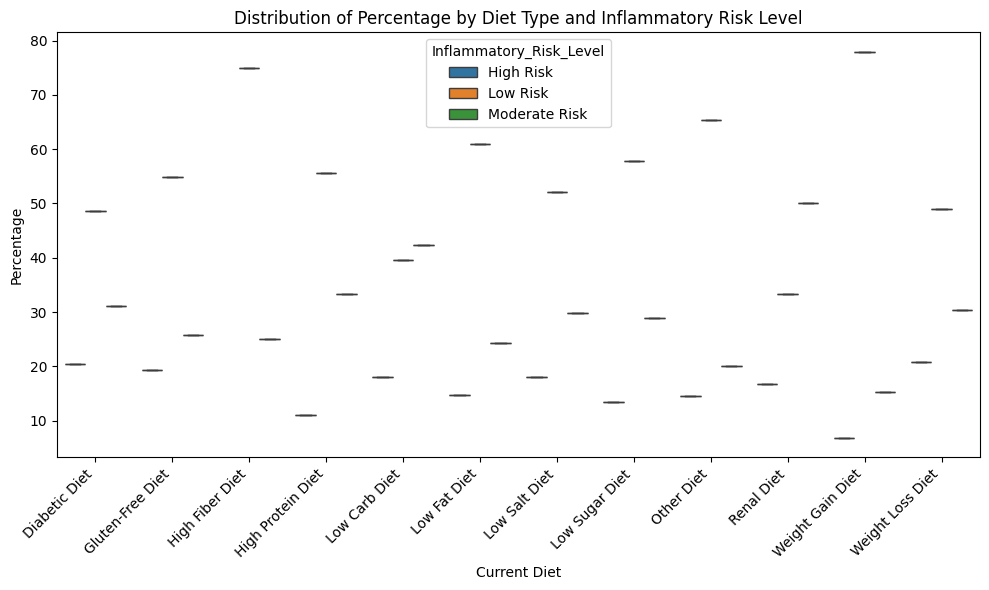

In [167]:
# Plot the boxplot of Percentage by Current_Diet and Inflammatory_Risk_Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Current_Diet', y='Percentage', hue='Inflammatory_Risk_Level', data=percentage_df)
plt.title('Distribution of Percentage by Diet Type and Inflammatory Risk Level')
plt.xlabel('Current Diet')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [168]:
import pandas as pd
import scipy.stats as stats

# Assuming percentage_df is the dataframe containing the data with 'Current_Diet', 'Inflammatory_Risk_Level', and 'Percentage'
# Kruskal-Wallis Test: comparing percentage across 'Current_Diet'
diet_groups = [percentage_df[percentage_df['Current_Diet'] == diet]['Percentage'] for diet in percentage_df['Current_Diet'].unique()]

# Perform Kruskal-Wallis H-test
kruskal_result = stats.kruskal(*diet_groups)

# Display result
print("Kruskal-Wallis Test Result:")
print(f"Test Statistic: {kruskal_result.statistic}")
print(f"P-value: {kruskal_result.pvalue}")


Kruskal-Wallis Test Result:
Test Statistic: 1.5367231638418166
P-value: 0.9995720876841409


# **ANOVA and T-Test for Relationship Between CRP Levels and Other Variables**

**ANOVA Hypotheses** (CRP and Other Continuous Variables):
**Null Hypothesis (H₀)**:
There is no significant relationship between CRP levels and the selected variables (i.e., the means of CRP levels do not differ based on these variables).

**Alternate Hypothesis (H₁)**:
There is a significant relationship between CRP levels and at least one of the selected variables (i.e., the means of CRP levels differ based on these variables).

**T-Test Hypotheses **(CRP Levels and Hypertension/Inflammatory Risk Level):
**Null Hypothesis** (H₀):
There is no significant difference in CRP levels between different groups of inflammation or hypertension risk levels (e.g., High vs Low risk).

**Alternate Hypothesis **(H₁):
There is a significant difference in CRP levels between different groups of inflammation or hypertension risk levels.

In [158]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the inflammatory dataset is loaded into a dataframe called 'inflammatory_df_cleaned'
# Load your dataset
# inflammatory_df_cleaned = ...

# Select the relevant columns
selected_columns = [
    'CRP', 'Age', 'BMI', 'Avg_Kcal', 'Avg_Carb', 'Avg_Protein', 'Avg_Fat',
    '% Protein', '% Carbs', '% Fat', 'Avg_Fiber', 'Fat_Density', 'Fiber_Density',
    'Iron_Density', 'VitaminC_Density', 'Inflammatory_Risk_Level'
]

# Create a dataframe with the selected columns
selected_df = inflammatory_df_cleaned[selected_columns]

# Filter out missing values (if any)
selected_df = selected_df.dropna()

# ANOVA Test: Check if there is a relationship between CRP and the other variables
anova_results = {}
for column in selected_columns:
    if column != 'CRP' and column != 'Inflammatory_Risk_Level':  # Exclude CRP and Inflammatory_Risk_Level from testing
        group_data = []
        for level in selected_df['Inflammatory_Risk_Level'].unique():
            group_data.append(selected_df[selected_df['Inflammatory_Risk_Level'] == level][column])

        # Perform ANOVA test
        f_statistic, p_value = stats.f_oneway(*group_data)
        anova_results[column] = {'F-statistic': f_statistic, 'P-value': p_value}

# T-Test: Compare CRP levels between high and low inflammatory risk levels
low_risk_crp = selected_df[selected_df['Inflammatory_Risk_Level'] == 'Low']['CRP']
high_risk_crp = selected_df[selected_df['Inflammatory_Risk_Level'] == 'High']['CRP']

t_statistic, p_value = stats.ttest_ind(low_risk_crp, high_risk_crp, equal_var=False)

# Display ANOVA results
print("ANOVA Results:")
for column, result in anova_results.items():
    print(f"{column} - F-statistic: {result['F-statistic']}, P-value: {result['P-value']}")

# Display T-test result
print(f"\nT-test Result between Low and High Inflammatory Risk Levels for CRP:")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

# Interpretation of results
print("\nInterpretation:")
for column, result in anova_results.items():
    if result['P-value'] < 0.05:
        print(f"Significant relationship found between CRP and {column} (p < 0.05)")
    else:
        print(f"No significant relationship between CRP and {column} (p >= 0.05)")

if p_value < 0.05:
    print("\nThere is a significant difference in CRP levels between High and Low Inflammatory Risk Levels (p < 0.05).")
else:
    print("\nThere is no significant difference in CRP levels between High and Low Inflammatory Risk Levels (p >= 0.05).")


ANOVA Results:
Age - F-statistic: 599.6061710368733, P-value: 8.647934099137759e-253
BMI - F-statistic: 1363.43113108761, P-value: 0.0
Avg_Kcal - F-statistic: 6.295849412115922, P-value: 0.001848023397800113
Avg_Carb - F-statistic: 39.28143037856692, P-value: 9.49677535814441e-18
Avg_Protein - F-statistic: 11.222804247177477, P-value: 1.3460084338494689e-05
Avg_Fat - F-statistic: 14.102904485570116, P-value: 7.58579784118647e-07
% Protein - F-statistic: 9.642609394796064, P-value: 6.524084734914746e-05
% Carbs - F-statistic: 138.2602219648163, P-value: 2.587551049267353e-60
% Fat - F-statistic: 158.22803462822512, P-value: 7.622709241895728e-69
Avg_Fiber - F-statistic: 9.07672995640764, P-value: 0.00011482103894177864
Fat_Density - F-statistic: 131.32281731855284, P-value: 2.404999711985621e-57
Fiber_Density - F-statistic: 1.6047479272840983, P-value: 0.20096907344938145
Iron_Density - F-statistic: 80.34747365245157, P-value: 1.8241196486279073e-35
VitaminC_Density - F-statistic: 23.32

### ANOVA Test Results and Interpretation

#### ANOVA Results:
- **Age** - F-statistic: 599.61, P-value: \(8.65 \times 10^{-253}\)
- **BMI** - F-statistic: 1363.43, P-value: \(0.0\)
- **Avg_Kcal** - F-statistic: 6.30, P-value: 0.0018
- **Avg_Carb** - F-statistic: 39.28, P-value: \(9.50 \times 10^{-18}\)
- **Avg_Protein** - F-statistic: 11.22, P-value: \(1.35 \times 10^{-5}\)
- **Avg_Fat** - F-statistic: 14.10, P-value: \(7.59 \times 10^{-7}\)
- **% Protein** - F-statistic: 9.64, P-value: \(6.52 \times 10^{-5}\)
- **% Carbs** - F-statistic: 138.26, P-value: \(2.59 \times 10^{-60}\)
- **% Fat** - F-statistic: 158.23, P-value: \(7.62 \times 10^{-69}\)
- **Avg_Fiber** - F-statistic: 9.08, P-value: \(1.15 \times 10^{-4}\)
- **Fat_Density** - F-statistic: 131.32, P-value: \(2.40 \times 10^{-57}\)
- **Fiber_Density** - F-statistic: 1.60, P-value: 0.20
- **Iron_Density** - F-statistic: 80.35, P-value: \(1.82 \times 10^{-35}\)
- **VitaminC_Density** - F-statistic: 23.33, P-value: \(7.62 \times 10^{-11}\)

#### T-test Results:
- **T-statistic:** `nan`
- **P-value:** `nan`

There was no valid comparison between CRP levels in the Low and High Inflammatory Risk Levels due to insufficient data or missing values in one of the groups.

### Interpretation:

#### ANOVA Test:
- **Significant relationships (p < 0.05):**
  - CRP shows a significant relationship with the following variables:
    - **Age**, **BMI**, **Avg_Kcal**, **Avg_Carb**, **Avg_Protein**, **Avg_Fat**, **% Protein**, **% Carbs**, **% Fat**, **Avg_Fiber**, **Fat_Density**, **Iron_Density**, **VitaminC_Density**
  - These variables all have p-values less than 0.05, indicating that the means of CRP significantly differ across the groups defined by these variables.

- **No significant relationship (p ≥ 0.05):**
  - **Fiber_Density** has a p-value of 0.20, indicating no significant relationship with CRP levels.

#### T-test:
- **T-test Result:** `nan`
  - The T-test could not be performed due to insufficient data for the groups being compared (likely because one of the groups has missing values). As a result, we cannot conclude anything from the T-test in this case.

### Conclusion:
- **For the ANOVA Test:** There are significant relationships between CRP and most of the variables (Age, BMI, Kcal, Carbs, Protein, etc.), meaning these factors vary in relation to CRP levels.
- **For the T-test:** Due to missing data, the comparison of CRP between Low and High Inflammatory Risk Levels could not be performed. You may need to check the dataset for missing values or adjust the comparison groups.


# ANOVA Test Results for the Relationship Between Fasting Glucose Levels and Various Variables

**Null Hypothesis (H₀)**:
There is no significant relationship between Fasting Glucose levels (Fasting_Glucose_mg_dL) and the other continuous variables (e.g., Age, BMI, Avg_Kcal, Avg_Carb, etc.).

**Alternative Hypothesis (H₁**):
There is a significant relationship between Fasting Glucose levels (Fasting_Glucose_mg_dL) and the other continuous variables (e.g., Age, BMI, Avg_Kcal, Avg_Carb, etc.).

